최형준 작성

- 2022 I-Maas
- 지금까지 진행한 모든 내용
- 코드 깔끔히 정리할 필요..

- DTG txt file 15개 사용
- 10시간 정도 소요

11/4
- 평가지표
    - 점수 부여
    - 엔트로피 가중치
    
- 운전자 평가

11/5
- eval_result에 전체 불일치도 값(result) 복사
    - result 구하는데만 10시간
    - 안전 운행 데이터와 비교할 때 사용
    - eval_result의 중앙값 가져와 안전 운행일 때 점수가 어떻게 나오는지 확인해보기
    
- 평가지표 개선 필요
    - 기존의 clusters_eval 대신
    - test_eval 임의로 safety/danger 부여 -> 결과 확인해보기

# 실험 데이터 탐색

In [1]:
import os

file_list = os.listdir('C:\\Users\\tactics\\I-Maas\\DTG\\DTG')
file_list[277:307]

['20210701_░ц▒т71╣┘1001.txt',
 '20210701_░ц▒т71╣┘1002.txt',
 '20210701_░ц▒т71╣┘1003.txt',
 '20210701_░ц▒т71╣┘1004.txt',
 '20210701_░ц▒т71╣┘1005.txt',
 '20210701_░ц▒т71╣┘1011.txt',
 '20210701_░ц▒т71╣┘1014.txt',
 '20210701_░ц▒т71╣┘1021.txt',
 '20210701_░ц▒т71╣┘1023.txt',
 '20210701_░ц▒т71╣┘1024.txt',
 '20210701_░ц▒т71╣┘1027.txt',
 '20210701_░ц▒т71╣┘1028.txt',
 '20210701_░ц▒т71╣┘1030.txt',
 '20210701_░ц▒т71╣┘1033.txt',
 '20210701_░ц▒т71╣┘1038.txt',
 '20210701_░ц▒т71╣┘1045.txt',
 '20210701_░ц▒т71╣┘1052.txt',
 '20210701_░ц▒т71╣┘1071.txt',
 '20210701_░ц▒т71╣┘1093.txt',
 '20210701_░ц▒т71╣┘1098.txt',
 '20210701_░ц▒т71╣┘1099.txt',
 '20210701_░ц▒т71╣┘1102.txt',
 '20210701_░ц▒т71╣┘1103.txt',
 '20210701_░ц▒т71╣┘1104.txt',
 '20210701_░ц▒т71╣┘1107.txt',
 '20210701_░ц▒т71╣┘1109.txt',
 '20210701_░ц▒т71╣┘1111.txt',
 '20210701_░ц▒т71╣┘1114.txt',
 '20210701_░ц▒т71╣┘1115.txt',
 '20210701_░ц▒т71╣┘1116.txt']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dir_ = 'C:\\Users\\tactics\\I-Maas\\DTG\\DTG\\'
data_15 = []
file_num = ['1001', '1002' ,'1003' , '1004', '1011', '1014', '1021', '1024', \
            '1030', '1038', '1045', '1052', '1093', '1098', '1104']

for num in file_num:
    input_file = open(dir_+'20210701_░ц▒т71╣┘'+num+'.txt','r',encoding='cp949')
    data_15.append(input_file.read())

In [3]:
for i in range(15):
    print(f"file_{i+1} info : \n{data_15[i][:76]}")

file_1 info : 
############ODR-1200KMJTA18GP5C00856111경기71바10011238100831######Not_00000000
file_2 info : 
############ODR-1200KMJTA18GP########11경기71바10021238100831######Not_00000000
file_3 info : 
############ODR-12001111111111111111111경기71바10030000000000######Not_00000000
file_4 info : 
############ODR-1200#################11경기71바10040000000000######Not_00000000
file_5 info : 
############ODR-12001111111111111111111경기71바10110000000000######Not_00000000
file_6 info : 
############ODR-1200KL5UM52MD5P02551711경기71바10141238100831######Not_00000000
file_7 info : 
############ODR-1200KL5UM52MD5P02551811경기71바10211238100831######Not_00000000
file_8 info : 
############ODR-1200KMJTA18GP5C00940811경기71바10241238100831######Not_00000000
file_9 info : 
############ODR-1200KMJTA18LP8C00006011경기71바10301238100831######Not_00000000
file_10 info : 
############ODR-1200KMJTA18LP8C00008511경기71바10381238100831######Not_00000000
file_11 info : 
############ODR-1200KMJTA18KPBC00179111경기71바10451238100831#####

In [4]:
data_row = [int((len(data_15[i])-76)/68) for i in range(15)]
data_row

[49174,
 58306,
 50354,
 58085,
 51271,
 55297,
 55191,
 56445,
 55280,
 49095,
 53515,
 47431,
 55202,
 50654,
 52005]

In [5]:
# 130분 정도 걸림
from time import time
start = time()

df_sum = pd.DataFrame()

for i in range(15):
    df = pd.DataFrame(columns=['daily_dist','total_dist','event_date','velocity(km/h)',
                           'RPM','break_on','lat','lon','angle','acc_x','acc_y','status'])
    j=0
    while True:
        line = data_15[i][76+j*68:144+j*68]
        if line=='':break
        df.loc[j]=[line[:4],line[4:11],line[11:25],line[25:28],line[28:32],
                   line[32:33],line[33:42],line[42:51],line[51:54],line[54:60],line[60:66],line[66:68]]
        j+=1
        if j%data_row[i]==0:break
    
    df_sum = pd.concat([df_sum, df], ignore_index=True)

end = time()
print(f"{int((end-start)/60)}분")

212분


In [6]:
df_sum

,daily_dist,total_dist,event_date,velocity(km/h),RPM,break_on,lat,lon,angle,acc_x,acc_y,status
0,0000,0138101,21070104170800,000,0568,0,126959101,037303219,000,+004.1,-000.7,00
1,0000,0138101,21070104170900,000,0567,0,126959101,037303219,000,+004.3,-000.9,00
2,0000,0138101,21070104171000,000,0566,0,126959101,037303219,000,+004.0,-000.9,00
3,0000,0138101,21070104171100,000,0570,0,126959101,037303219,000,+004.3,-001.1,00
4,0000,0138101,21070104171200,000,0568,0,126959101,037303219,000,+004.3,-000.8,00
...,...,...,...,...,...,...,...,...,...,...,...,...
797300,0203,0202690,21070122335000,000,0740,1,126893699,037409857,213,-000.5,-000.2,00
797301,0203,0202690,21070122335100,000,0740,1,126893699,037409857,215,-000.3,+000.0,00
797302,0203,0202690,21070122335200,000,0680,1,126893699,037409857,216,-000.7,-000.0,00
797303,0203,0202690,21070122335300,000,0680,0,126893699,037409857,237,-000.6,-000.5,00


In [7]:
df = df_sum.copy()

In [8]:
# dtype 변경
for i in df.index:
    try:df.loc[i,['velocity(km/h)','RPM','angle','acc_x','acc_y']].astype(float)
    except:df.loc[i]=(df.loc[i-1].astype(float)+df.loc[i+1].astype(float))/2

[]

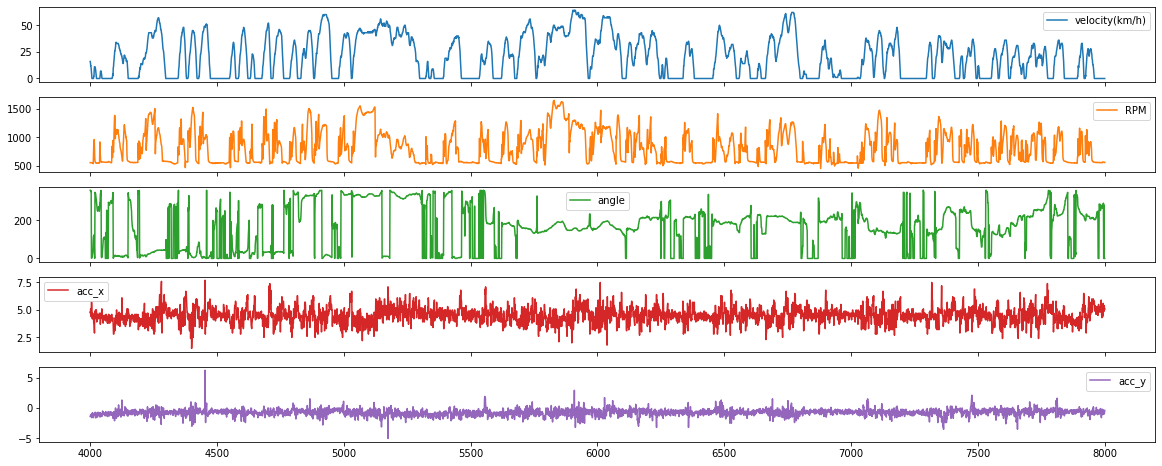

In [9]:
# 4000~8000초 간 데이터 변화
df_sample = df.loc[4000:8000]
df_sample[['velocity(km/h)','RPM','angle','acc_x','acc_y']].astype(float).plot(subplots=True, figsize=(20, 8))
plt.legend(loc='best')
plt.plot()

# 주행 변화 감지

### uLSIF
- #### 앞뒤 15초 간 데이터의 밀도 비 차이를 이용한 불일치도 측정
    - ###### 데이터 : 속도, 가속도, 요레이트
- #### 불일치도 상위 5% 지점 -> 급격한 주행 변화 '발생 시점'으로 분류

### 가속도, 요레이트 데이터 생성
- ##### yaw rate : {현재 angle} - {1초 전 angle}
- ##### acceleration : {현재 velocity} - {1초 전 velocity}

In [10]:
df['yaw_rate'] = None
df['acceleration'] = None
for idx1,idx2 in zip(df.index[:-1],df.index[1:]):
    yaw1,vel1 = df.loc[idx1,['angle','velocity(km/h)']]
    yaw2,vel2 = df.loc[idx2,['angle','velocity(km/h)']]
    df.loc[idx2,'yaw_rate'] = float(yaw2)-float(yaw1)
    df.loc[idx2,'acceleration'] = float(vel2)-float(vel1)

[]

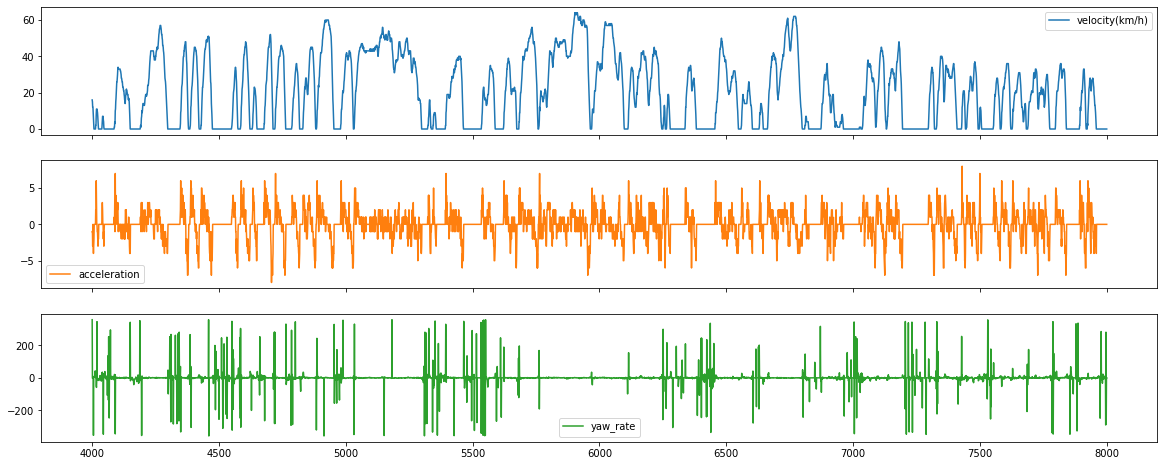

In [11]:
df_sample = df.loc[4000:8000]
df_sample[['velocity(km/h)','acceleration','yaw_rate']].astype(float).plot(subplots=True, figsize=(20, 8))
plt.legend(loc='best')
plt.plot()

### 불일치도 계산 - 병렬처리

#### ray : 기존 코드에서 약간의 수정을 통한 병렬 처리
- ##### (1) 함수 작성
- ##### (2) 데코레이터 @ray.remote로 함수 감싸기
- ##### (3) 함수 호출 : function.remote()
- ##### (4) 값 반환 : ray.get(function.remote())

In [12]:
# 병렬처리
!pip install densratio
!pip install ray
!pip install parmap

import numpy as np
from scipy.stats import norm
from densratio import densratio
import ray
import parmap
import multiprocessing

np.random.seed(1)

os.environ['RAY_DISABLE_MEMORY_MONITOR'] = '1'

# 불일치도
@ray.remote
def dissimmirality(x,y,n,obj):
    return 1/(2*n)*(obj.compute_density_ratio(y)**2).sum()+\
        (1/n)*obj.compute_density_ratio(x).sum()-\
            1./2

# 앞뒤 15초 간 데이터 밀도 비 차이를 기반으로 불일치도 계산
@ray.remote
def function(i,data):
    x = data[i:i+15] # 앞 15초
    y = data[i+15:i+30] # 뒤 15초
    densratio_obj = densratio(x, y, alpha=0,verbose=False) # 밀도 비 계산
    dissim = dissimmirality.remote(x,y,15,densratio_obj) # 불일치도 계산
    return dissim


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
# 430분 정도 걸림
start = time()

data = df[['velocity(km/h)','acceleration','yaw_rate']].astype(float).values[1:]

input_list = range(len(data)-30)
result = ray.get([function.remote(i,data) for i in input_list]) # 불일치도 계산
result = [ray.get(i) for i in result]+[0]*15 # 처음 15초, 끝 15초는 불일치도 0

eval_result = result # 복사

end = time()
print(f"{int((end-start)/60)}분")

2022-11-08 00:43:19,784	INFO worker.py:1518 -- Started a local Ray instance.
(function pid=15512) C:\Users\tactics\anaconda3\lib\site-packages\densratio\RuLSIF.py:118: RuntimeWarning: divide by zero encountered in log
(function pid=15512)   divergence = log(g_x).sum(axis=0) / n
(function pid=7576) C:\Users\tactics\anaconda3\lib\site-packages\densratio\RuLSIF.py:118: RuntimeWarning: divide by zero encountered in log
(function pid=7576)   divergence = log(g_x).sum(axis=0) / n
(function pid=21056) C:\Users\tactics\anaconda3\lib\site-packages\densratio\RuLSIF.py:118: RuntimeWarning: divide by zero encountered in log
(function pid=21056)   divergence = log(g_x).sum(axis=0) / n
(function pid=17244) C:\Users\tactics\anaconda3\lib\site-packages\densratio\RuLSIF.py:118: RuntimeWarning: divide by zero encountered in log
(function pid=17244)   divergence = log(g_x).sum(axis=0) / n
(function pid=9784) C:\Users\tactics\anaconda3\lib\site-packages\densratio\RuLSIF.py:118: RuntimeWarning: divide by z

609분


In [14]:
!ps -ef

'ps'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


### 불일치도 데이터 생성

In [181]:
len(result)

39984

In [188]:
len(eval_result)

797289

In [189]:
result = eval_result.copy()
len(result)

797289

In [190]:
# 초기값(None) + 첫 15초 간 불일치도 값(None) : 1 + 15개
zero_df = pd.DataFrame({'dissim' : [0 for i in range(1+15)]})
# zero_df

In [191]:
# 불일치도 값 + 끝 15초 간 불일치도 값(None)
result_df = pd.DataFrame({'dissim' : result})
# result_df

In [192]:
result_df.to_csv('result_df.csv')

In [199]:
# 전체 불일치도 df 생성
# 초기값 None(1) + 첫 15초 None(15) + 불일치도 값 + 끝 15초 None(15)
dissim_df = pd.concat([zero_df, result_df], ignore_index = True)
# dissim_df

In [200]:
# 불일치도(dissim) df 삽입
# new_df
new_df = df.copy()
new_df = pd.concat([new_df, dissim_df], axis=1)
new_df.head()

,daily_dist,total_dist,event_date,velocity(km/h),RPM,break_on,lat,lon,angle,acc_x,acc_y,status,yaw_rate,acceleration,dissim
0,0000,0191903,21070104392100,000,0680,1,126896076,037420969,000,+008.6,-001.6,00,None,None,0.0
1,0000,0191903,21070104392200,000,0660,1,126896076,037420969,000,+008.7,-001.9,00,0.0,0.0,0.0
2,0000,0191903,21070104392300,000,0680,1,126896076,037420969,000,+008.3,-001.7,00,0.0,0.0,0.0
3,0000,0191903,21070104392400,000,0660,1,126896076,037420969,000,+008.6,-001.6,00,0.0,0.0,0.0
4,0000,0191903,21070104392500,000,0680,1,126896076,037420969,000,+008.4,-001.5,00,0.0,0.0,0.0


[]

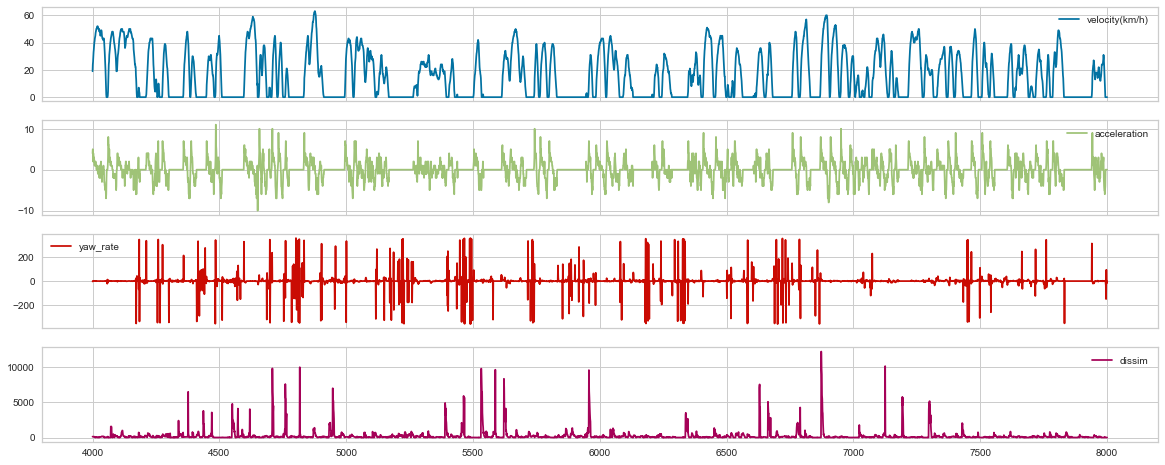

In [201]:
# 4000~8000초 간 속도, 가속도, 요레이트, 불일치도
df_sample = new_df.loc[4000:8000]
df_sample[['velocity(km/h)','acceleration','yaw_rate','dissim']].astype(float).plot(subplots=True, figsize=(20, 8))
plt.legend(loc='best')
plt.plot()

### 급격한 주행 변화 발생 지점 추출

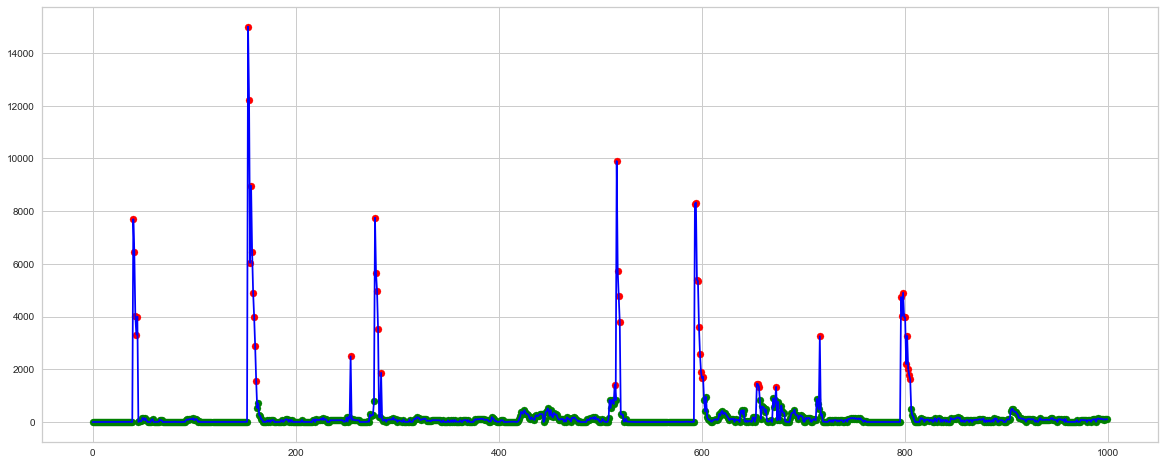

In [202]:
# 0~1000초 간 driving event 발생 지점
y = np.array(result[:1000])
x = np.arange(len(result[:1000]))

# 임계값 : 상위 5%
threshold = np.quantile(result,0.95)

plt.figure(figsize=(20,8))
plt.plot(x, y, color='blue')

# 임계값을 넘지 않은 값 : green
below_threshold = y < threshold
plt.scatter(x[below_threshold], y[below_threshold], color='green') 

# 임계값을 넘은 값 : red -> driving event
above_threshold = np.logical_not(below_threshold)
plt.scatter(x[above_threshold], y[above_threshold], color='red')

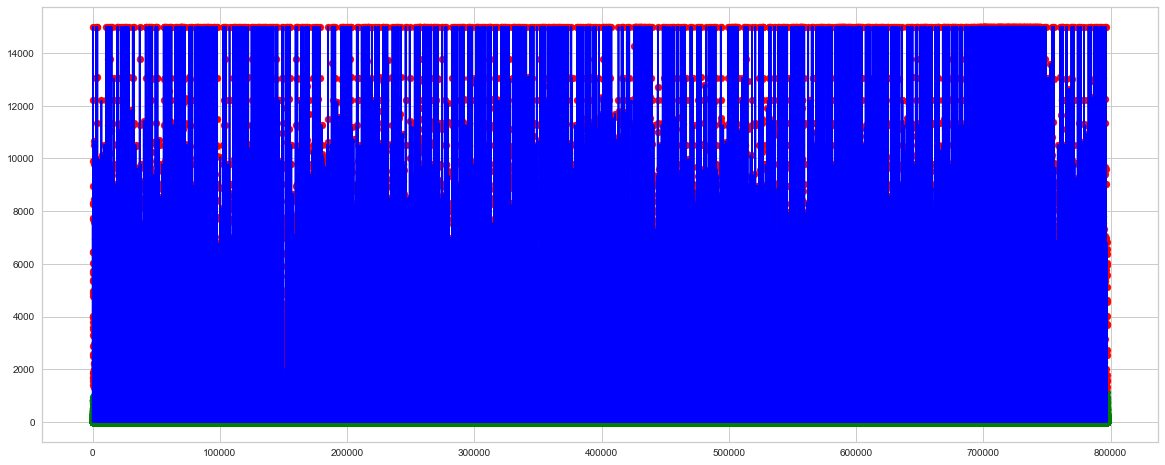

In [203]:
# 하루 운행 중 driving event 발생 지점
y = np.array(result[:])
x = np.arange(len(result[:]))

# 임계값 : 상위 5%
threshold = np.quantile(result,0.95)

plt.figure(figsize=(20,8))
plt.plot(x, y, color='blue')

# 임계값을 넘지 않은 값 : green
below_threshold = y < threshold
plt.scatter(x[below_threshold], y[below_threshold], color='green') 

# 임계값을 넘은 값 : red -> driving event
above_threshold = np.logical_not(below_threshold)
plt.scatter(x[above_threshold], y[above_threshold], color='red')

In [204]:
threshold

1190.1762791021417

### Driving Event 정의
- #### red point 이후 15초는 이전 15초에 비해 급격한 변화가 생긴 것
- #### red point 이후 15초 간 속도, 가속도, 요레이트 데이터 추출
    - ##### -> Driving Event (15X3)

In [205]:
detected = []
for idx in new_df.index:
    if new_df.loc[idx,'dissim']>=threshold:
        values = new_df.loc[idx:idx+14,['velocity(km/h)','acceleration','yaw_rate']].astype(float).values.tolist()
        detected.append(values)

In [206]:
# 전체 데이터의 5%
driving_event = np.array(detected)
len(driving_event)

39865

In [207]:
# 하나의 driving event : 15초 간 속도, 가속도, 요레이트 데이터
driving_event[777]

array([[43., -1.,  0.],
       [43.,  0.,  0.],
       [43.,  0.,  0.],
       [41., -2.,  1.],
       [40., -1.,  1.],
       [37., -3.,  1.],
       [34., -3.,  1.],
       [32., -2.,  1.],
       [30., -2.,  3.],
       [26., -4., -1.],
       [21., -5.,  0.],
       [19., -2., -1.],
       [15., -4.,  1.],
       [13., -2.,  1.],
       [10., -3.,  0.]])

### Driving Event 데이터프레임 생성
- #### DE_df
    - ##### 15X3 data
    - ##### index 부여

In [208]:
data_DE_df = {
    'driving event data(15X3)' : [driving_event[i] for i in range(len(driving_event))],
    'idx' : [j for j in range(len(driving_event))]
}

In [209]:
# driving event df
DE_df = pd.DataFrame(data_DE_df)
DE_df

,driving event data(15X3),idx
0,"[[0.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...",0
1,"[[0.0, 0.0, 1.0], [0.0, 0.0, -286.0], [0.0, 0....",1
2,"[[0.0, 0.0, -286.0], [0.0, 0.0, 0.0], [0.0, 0....",2
3,"[[0.0, 0.0, 0.0], [0.0, 0.0, 298.0], [0.0, 0.0...",3
4,"[[0.0, 0.0, 298.0], [0.0, 0.0, 0.0], [0.0, 0.0...",4
...,...,...
39860,"[[nan, nan, nan], [nan, nan, nan], [nan, nan, ...",39860
39861,"[[nan, nan, nan], [nan, nan, nan], [nan, nan, ...",39861
39862,"[[nan, nan, nan], [nan, nan, nan], [nan, nan, ...",39862
39863,"[[nan, nan, nan], [nan, nan, nan], [nan, nan, ...",39863


- ### 15개 dtg file -> driving event 대략 37500개 나옴
- ### 37500개를 64개씩 배치학습 시켜도 되나?
    #### (1000개 driving event 돌릴 때, 1 batch = 64 사용함)

# 차원 축소 모델 생성

In [28]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [29]:
class TensorDataset(torch.utils.data.Dataset):
    def __init__(self,x):
        self.x = x
    def __getitem__(self,index):
        return torch.from_numpy(self.x[index]).float()
    def __len__(self):
        return len(self.x)

In [30]:
# driving event 데이터 array -> tensor 변환
dataset = TensorDataset(driving_event)

# train set : validation set = 8 : 2
train_dataset,val_dataset = torch.utils.data.dataset.random_split(dataset,[int(len(dataset)*0.8),len(dataset)-int(len(dataset)*0.8)])

# 배치 단위 학습
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64,shuffle=True) # 1 batch : 64개 데이터
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=64)

### ANN AE

In [31]:
# ANN AutoEncoder
class AutoEncoder(nn.Module):
    def __init__(self, device, input_dim, hidden_dim1, hidden_dim2):
        super(AutoEncoder, self).__init__()
        
        # encoder
        self.enc1 = nn.Linear(input_dim,hidden_dim1).to(device)
        self.enc2 = nn.Linear(hidden_dim1,hidden_dim2).to(device)
        # decoder
        self.dec1 = nn.Linear(hidden_dim2,hidden_dim1).to(device)
        self.dec2 = nn.Linear(hidden_dim1,input_dim).to(device)

    # 입력 데이터 encode(차원 축소) -> decode(복원) -> 결과 return
    def forward(self, x):
        out = x.view(x.size(0), -1).to(device) # 15X3 -> 45X1 
        out = F.relu(self.enc1(out)).to(device) # 45 -> 64
        out = F.sigmoid(self.enc2(out)).to(device) # 64 -> 30
        out = F.relu(self.dec1(out)).to(device) # 30 -> 64
        out = self.dec2(out).to(device) # 64 -> 45
        out = out.view(x.size()).to(device)
        return out

    # encoder만 실행
    def get_codes(self, x):
        out = x.view(x.size(0), -1).to(device)
        out = F.relu(self.enc1(out)).to(device)
        out = F.sigmoid(self.enc2(out)).to(device)
        return out

In [32]:
# 손실함수 sparse loss function
def sparse_loss(model, x):
    loss = 0
    values = x.view(x.size(0), -1) # 차원 재구성
    model_children = list(model.children())
    model_function  = [F.relu,F.sigmoid,F.relu]
    for i in range(len(model_children))[:-1]:
        values = model_function[i]((model_children[i](values))) # 활성화 함수 적용(ReLU, Sigmoid)
        loss += torch.mean(torch.abs(values)) # 절댓값 씌워 평균 계산
    return loss

In [33]:
# 훈련
def train(model, Loss, optimizer, dataloader, scheduler, p):
    losses = []
    for batch_X in dataloader:

        batch_X = batch_X.to(device)
        optimizer.zero_grad() # gradient 초기화        
        
        # Forward Pass
        model.train()
        outputs = model(batch_X)
        mse_loss = Loss(outputs, batch_X) # 손실함수 : MSE(평균제곱오차) 사용
        l1_loss = sparse_loss(model,batch_X) # 희소손실 : L1 Loss = MAELoss(평균절대오차) 사용
        loss = mse_loss+p*l1_loss # p : 희소 가중치 하이퍼파라미터
        # 최종 Loss = MSE + {sparsity loss * sparsity weight}
        
        losses.append(loss.data)
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        scheduler.step()
        
    loss = sum(losses) / len(losses)
    return loss,model

In [34]:
# 검증
def validate(model, Loss, dataloader):
    losses = []
    for batch_X in dataloader:

        batch_X = batch_X.to(device)

        # Forward Pass
        model.eval()
        outputs = model(batch_X)
        loss = Loss(outputs, batch_X)
        losses.append(loss.data)

    loss = sum(losses) / len(losses)
    return loss,model

In [35]:
epochs = 50000 # 전체 데이터 50000번 돌림
learning_rate = 0.001 # LR 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # gpu 환경(cuda)
model = AutoEncoder(device, 45, 64, 30).to(device)

Loss = nn.MSELoss() # 손실함수 MSE
patience = 100 # 100번 돌렸는데 학습에 진전이 없으면 멈춤
sparsity_param = 0.1 # 희소 가중치 하이퍼파라미터

l2_weight = 0.001 
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=l2_weight) # Adam
scheduler = optim.lr_scheduler.LambdaLR(optimizer=optimizer, lr_lambda=lambda epoch: 1**epoch) # LambdaLR

In [36]:
# 손실함수 값 최소 : best epoch
train_losses = []
val_losses = []
for epoch in range(epochs):
    train_epoch_loss,model = train(model,Loss,optimizer,train_dataloader, scheduler, sparsity_param)
    val_epoch_loss,model = validate(model,Loss,val_dataloader)

    train_losses.append(train_epoch_loss.item())
    val_losses.append(val_epoch_loss.item())
    if epoch%500==0:
        print(f'epoch {epoch} | train loss : {train_epoch_loss:.2f} , val loss : {val_epoch_loss:.2f}')
        print('-'*70)
    if min(val_losses)==val_epoch_loss:
        best_model = model
        best_epoch = epoch
        best_loss = train_epoch_loss,val_epoch_loss
    if epoch>patience and min(val_losses[-patience:])==val_losses[-patience]:
        print(f'best epoch {best_epoch} | train loss : {best_loss[0]:.2f} , val loss : {best_loss[1]:.2f}')
        break

C:\Users\tactics\anaconda3\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch 0 | train loss : 1032.98 , val loss : 965.54
----------------------------------------------------------------------
epoch 500 | train loss : 15.04 , val loss : 13.16
----------------------------------------------------------------------
best epoch 410 | train loss : 15.37 , val loss : 13.11


In [37]:
# 차원 축소 결과 확인
# 15X3 => 30
best_model.get_codes(list(iter(train_dataloader))[0])[0]

tensor([0.1716, 0.3993, 0.3247, 0.3062, 0.3241, 0.2075, 0.3537, 0.3764, 0.1921,
        0.2828, 0.1376, 0.1979, 0.1526, 0.1735, 0.1361, 0.2424, 0.2919, 0.3499,
        0.3613, 0.3183, 0.2360, 0.1990, 0.2002, 0.6075, 0.2666, 0.2953, 0.5768,
        0.2816, 0.5994, 0.5479], device='cuda:0', grad_fn=<SelectBackward0>)

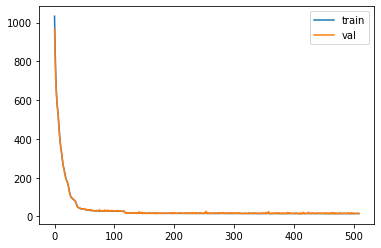

In [38]:
# 모델 수렴
plt.figure(figsize=(6,4))
plt.plot(train_losses,label='train')
plt.plot(val_losses,label='val')
plt.legend()
plt.show()

In [39]:
# gpu(cuda) 사용 가능 환경이면 True 반환
torch.cuda.is_available()

True

# Driving Event 차원 축소
- #### 64 X {15 X 3} => 64 X {30}

In [40]:
# 전체 driving event 차원 축소
total_dataloader = torch.utils.data.DataLoader(dataset, batch_size=64)
list(iter(total_dataloader))[0].shape

torch.Size([64, 15, 3])

In [41]:
result1 = []
for batch_X in total_dataloader:
    result1.append(best_model.get_codes(batch_X))

In [42]:
# 64X{30}
print(len(result1))
print(len(result1[0]))
print(len(result1[0][0]))

623
64
30


In [43]:
result2 = []
for x in result1:
    for y in x:
        result2.append(y)

In [44]:
# {30}
print(len(result2))
print(len(result2[0]))

39865
30


In [45]:
# tensor => array 변환
driving_event_DR = np.array([x.cpu().detach().numpy() for x in result2])
driving_event_DR.shape

(39865, 30)

In [46]:
# 차원축소 전 데이터 (15X3)
driving_event[2222]

array([[   0.,   -2.,  -58.],
       [   0.,    0.,  -57.],
       [   0.,    0.,    0.],
       [   0.,    0., -195.],
       [   2.,    2.,  170.],
       [   2.,    0.,   14.],
       [   6.,    4.,  108.],
       [   6.,    0.,   14.],
       [   5.,   -1.,    4.],
       [   4.,   -1.,    0.],
       [   1.,   -3.,    0.],
       [   0.,   -1.,  -11.],
       [   0.,    0.,  -40.],
       [   0.,    0., -259.],
       [   0.,    0.,    0.]])

In [47]:
# 차원축소 후 데이터 (30)
driving_event_DR[2222]

array([0.08013029, 0.1811275 , 0.39924422, 0.43867874, 0.58417803,
       0.23968993, 0.74253714, 0.59574306, 0.27365637, 0.5726006 ,
       0.20514406, 0.158566  , 0.16799419, 0.5591415 , 0.5705201 ,
       0.18350026, 0.65427256, 0.2752167 , 0.4250118 , 0.1308025 ,
       0.22813646, 0.28437376, 0.61372626, 0.5473255 , 0.49288297,
       0.16065526, 0.21398593, 0.5899178 , 0.49214676, 0.5766419 ],
      dtype=float32)

### 차원축소된 Driving Event 데이터프레임 생성
- #### changed_DE_df 생성
- #### 인덱스, 군집 컬럼 부여

In [48]:
data_changed_DE_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

In [49]:
changed_DE_df = pd.DataFrame(data_changed_DE_df)
changed_DE_df

,driving event data(30),idx
0,"[0.077358656, 0.28715965, 0.46281984, 0.390285...",0
1,"[0.5772779, 0.3335944, 0.22877356, 0.40069884,...",1
2,"[0.21412237, 0.37778926, 0.6467683, 0.26158324...",2
3,"[0.5229476, 0.33573458, 0.5157893, 0.36078018,...",3
4,"[0.4332791, 0.7791929, 0.26861566, 0.5587514, ...",4
...,...,...
39860,"[0.22720577, 0.44113582, 0.29298115, 0.4404688...",39860
39861,"[0.21520565, 0.47082266, 0.3264124, 0.4168974,...",39861
39862,"[0.5531905, 0.44195536, 0.100500196, 0.3363461...",39862
39863,"[0.09232936, 0.34140673, 0.53336257, 0.1630135...",39863


# K-means Clustering


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=29), k=(1, 30))

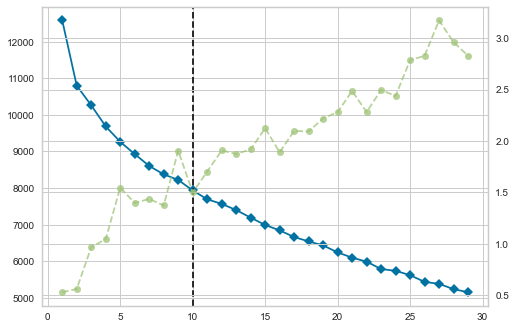

In [50]:
!pip install yellowbrick
!pip install sklearn

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,30))
visualizer.fit(driving_event_DR)

In [51]:
# K
K_elbow = visualizer.elbow_value_
K_elbow

10

In [52]:
# K_value = K_elbow

In [53]:
# 군집 수 임의로 설정
K_value = 8

In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(driving_event_DR)

In [55]:
kmeans = KMeans(n_clusters=K_value, init='k-means++', max_iter=300, random_state=10)
kmeans.fit(data_scale)

KMeans(random_state=10)

In [56]:
len(kmeans.cluster_centers_)

8

In [57]:
len(kmeans.labels_)

39865

In [58]:
changed_DE_df['cluster'] = kmeans.labels_
changed_DE_df

,driving event data(30),idx,cluster
0,"[0.077358656, 0.28715965, 0.46281984, 0.390285...",0,6
1,"[0.5772779, 0.3335944, 0.22877356, 0.40069884,...",1,4
2,"[0.21412237, 0.37778926, 0.6467683, 0.26158324...",2,6
3,"[0.5229476, 0.33573458, 0.5157893, 0.36078018,...",3,2
4,"[0.4332791, 0.7791929, 0.26861566, 0.5587514, ...",4,1
...,...,...,...
39860,"[0.22720577, 0.44113582, 0.29298115, 0.4404688...",39860,3
39861,"[0.21520565, 0.47082266, 0.3264124, 0.4168974,...",39861,3
39862,"[0.5531905, 0.44195536, 0.100500196, 0.3363461...",39862,4
39863,"[0.09232936, 0.34140673, 0.53336257, 0.1630135...",39863,4


### 각 Cluster에 해당하는 데이터 인덱스 추출
- ##### cluster_dic

In [59]:
cluster_dic = {}
    
for i in range(K_value):
    cluster_dic[f"cluster_{i}"] = list(changed_DE_df.groupby('cluster').get_group(i)['idx'])
    
cluster_dic.keys()

dict_keys(['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7'])

In [60]:
# cluster_5 해당하는 인덱스
# cluster_dic['cluster_5']

### Cluster와 Driving Event 데이터 인덱스 매칭
- #### 차원축소된 데이터의 군집화 결과를 기존 데이터와 매치 : 인덱스 이용

In [61]:
# 기존 데이터(15X3)
DE_df

,driving event data(15X3),idx
0,"[[0.0, 0.0, 3.0], [0.0, 0.0, 9.0], [0.0, 0.0, ...",0
1,"[[0.0, 0.0, 9.0], [0.0, 0.0, 9.0], [0.0, 0.0, ...",1
2,"[[0.0, 0.0, 9.0], [0.0, 0.0, -247.0], [0.0, 0....",2
3,"[[0.0, 0.0, -247.0], [0.0, 0.0, 269.0], [0.0, ...",3
4,"[[0.0, 0.0, 269.0], [0.0, 0.0, -269.0], [0.0, ...",4
...,...,...
39860,"[[10.0, -6.0, 8.0], [5.0, -5.0, 5.0], [0.0, -5...",39860
39861,"[[5.0, -5.0, 5.0], [0.0, -5.0, 7.0], [0.0, 0.0...",39861
39862,"[[8.0, -4.0, 3.0], [5.0, -3.0, 3.0], [3.0, -2....",39862
39863,"[[5.0, -3.0, 3.0], [3.0, -2.0, -355.0], [0.0, ...",39863


In [62]:
# 차원축소 데이터(30)
changed_DE_df

,driving event data(30),idx,cluster
0,"[0.077358656, 0.28715965, 0.46281984, 0.390285...",0,6
1,"[0.5772779, 0.3335944, 0.22877356, 0.40069884,...",1,4
2,"[0.21412237, 0.37778926, 0.6467683, 0.26158324...",2,6
3,"[0.5229476, 0.33573458, 0.5157893, 0.36078018,...",3,2
4,"[0.4332791, 0.7791929, 0.26861566, 0.5587514, ...",4,1
...,...,...,...
39860,"[0.22720577, 0.44113582, 0.29298115, 0.4404688...",39860,3
39861,"[0.21520565, 0.47082266, 0.3264124, 0.4168974,...",39861,3
39862,"[0.5531905, 0.44195536, 0.100500196, 0.3363461...",39862,4
39863,"[0.09232936, 0.34140673, 0.53336257, 0.1630135...",39863,4


### 전체 Cluster 분석
- #### 평균 속도, 평균 가속도, 평균 요레이트

In [63]:
clusters_total = pd.DataFrame()

for key in cluster_dic.keys():
    total_df = DE_df.iloc[cluster_dic[key]]
    total_df.reset_index(drop=True, inplace=True)
    
    mean_df = pd.DataFrame(total_df['driving event data(15X3)'].mean(), columns=[['velocity', 'acceleration', 'yaw rate']])

    cluster_df = pd.DataFrame(mean_df.mean())
    cluster_df = cluster_df.transpose()
    
    clusters_total = pd.concat([clusters_total, cluster_df])
    
clusters_total.index = list(cluster_dic.keys())

In [64]:
# 전체 클러스터의 속도, 가속도, 요레이트 평균값 df
clusters_total = clusters_total.round(2)
clusters_total

,velocity,acceleration,yaw rate
cluster_0,23.18,1.45,-0.02
cluster_1,14.55,1.41,14.04
cluster_2,15.00,1.39,10.02
cluster_3,7.01,-0.56,-0.12
cluster_4,6.51,-0.14,-2.62
cluster_5,8.37,-0.03,-4.67
cluster_6,8.60,0.26,3.79
cluster_7,39.27,-0.13,0.05


### 평가지표
- #### 속도, 가속도, 요레이트에 대한 평가지표 삽입

In [65]:
clusters_eval = clusters_total.copy()
clusters_eval

,velocity,acceleration,yaw rate
cluster_0,23.18,1.45,-0.02
cluster_1,14.55,1.41,14.04
cluster_2,15.00,1.39,10.02
cluster_3,7.01,-0.56,-0.12
cluster_4,6.51,-0.14,-2.62
cluster_5,8.37,-0.03,-4.67
cluster_6,8.60,0.26,3.79
cluster_7,39.27,-0.13,0.05


In [66]:
# 속도
h_val = clusters_eval['velocity'].quantile(q=0.66).values[0].round(2)
m_val = clusters_eval['velocity'].quantile(q=0.33).values[0].round(2)
print(f"[level] velocity_evaluation \nHigh : {h_val} 이상\n\
Mid : {m_val} 이상 | {h_val} 이하\n\
Low : {m_val} 이하")

[level] velocity_evaluation 
High : 14.83 이상
Mid : 8.44 이상 | 14.83 이하
Low : 8.44 이하


In [67]:
condition_ls = [
    (clusters_eval['velocity'] >= h_val),
    (clusters_eval['velocity'] >= m_val) & (clusters_eval['velocity'] < h_val),
    (clusters_eval['velocity'] < m_val)
]
choice_ls = ['High', 'Mid', 'Low']

clusters_eval['velocity_eval'] = np.select(condition_ls, choice_ls)

In [68]:
# 가속도
low_u = clusters_eval['acceleration'].quantile(q=0.85).values[0].round(2)
low_d = clusters_eval['acceleration'].quantile(q=0.15).values[0].round(2)
mid_u = clusters_eval['acceleration'].quantile(q=0.70).values[0].round(2)
mid_d = clusters_eval['acceleration'].quantile(q=0.30).values[0].round(2)
high_u = clusters_eval['acceleration'].quantile(q=0.55).values[0].round(2)
high_d = clusters_eval['acceleration'].quantile(q=0.45).values[0].round(2)
print(f"[danger] acc_safety \nLow : {low_u} 이상  | {low_d} 이하\n\
Mid : {mid_u} 이상  | {mid_d} 이하\n\
High : {high_u} 이상 | {high_d} 이하")

[danger] acc_safety 
Low : 1.41 이상  | -0.14 이하
Mid : 1.28 이상  | -0.12 이하
High : 0.22 이상 | 0.01 이하


In [69]:
clusters_eval['acc_safety'] = clusters_eval.apply(
    lambda x: 'danger' 
    if (
        ((x['velocity_eval'] == 'Low') & ((x['acceleration'] >= low_u) | (x['acceleration'] <= low_d))) |
        ((x['velocity_eval'] == 'Mid') & ((x['acceleration'] >= mid_u) | (x['acceleration'] <= mid_d))) |
        ((x['velocity_eval'] == 'High') & ((x['acceleration'] >= high_u) | (x['acceleration'] <= high_d)))
       )
    else 'safety', axis='columns')

In [70]:
# 요레이트
low_u = clusters_eval['yaw rate'].quantile(q=0.85).values[0].round(2)
low_d = clusters_eval['yaw rate'].quantile(q=0.15).values[0].round(2)
mid_u = clusters_eval['yaw rate'].quantile(q=0.70).values[0].round(2)
mid_d = clusters_eval['yaw rate'].quantile(q=0.30).values[0].round(2)
high_u = clusters_eval['yaw rate'].quantile(q=0.55).values[0].round(2)
high_d = clusters_eval['yaw rate'].quantile(q=0.45).values[0].round(2)
print(f"[danger] steer_safety \nLow : {low_u} 이상  | {low_d} 이하\n\
Mid : {mid_u} 이상  | {mid_d} 이하\n\
High : {high_u} 이상 | {high_d} 이하")

[danger] steer_safety 
Low : 9.71 이상  | -2.5 이하
Mid : 3.42 이상  | -0.11 이하
High : 0.04 이상 | -0.01 이하


In [71]:
clusters_eval['steer_safety'] = clusters_eval.apply(
    lambda x: 'danger' 
    if (
        ((x['velocity_eval'] == 'Low') & ((x['yaw rate'] >= low_u) | (x['yaw rate'] <= low_d))) |
        ((x['velocity_eval'] == 'Mid') & ((x['yaw rate'] >= mid_u) | (x['yaw rate'] <= mid_d))) |
        ((x['velocity_eval'] == 'High') & ((x['yaw rate'] >= high_u) | (x['yaw rate'] <= high_d)))
       )
    else 'safety', axis='columns')

In [72]:
# 평가지표 삽입
clusters_eval

,velocity,acceleration,yaw rate,velocity_eval,acc_safety,steer_safety
cluster_0,23.18,1.45,-0.02,High,danger,danger
cluster_1,14.55,1.41,14.04,Mid,danger,danger
cluster_2,15.00,1.39,10.02,High,danger,danger
cluster_3,7.01,-0.56,-0.12,Low,danger,safety
cluster_4,6.51,-0.14,-2.62,Low,danger,danger
cluster_5,8.37,-0.03,-4.67,Low,safety,danger
cluster_6,8.60,0.26,3.79,Mid,safety,danger
cluster_7,39.27,-0.13,0.05,High,danger,danger


In [73]:
# 임의로 평가지표 만들어보기(성능 개선)
test_eval = clusters_eval.copy()
test_eval['acc_safety'] = ['safety', 'danger', 'danger', 'safety', 'safety', 'danger', 'safety', 'danger']
test_eval['steer_safety'] = ['danger', 'danger', 'safety', 'danger', 'safety', 'danger', 'safety', 'safety']
test_eval

,velocity,acceleration,yaw rate,velocity_eval,acc_safety,steer_safety
cluster_0,23.18,1.45,-0.02,High,safety,danger
cluster_1,14.55,1.41,14.04,Mid,danger,danger
cluster_2,15.00,1.39,10.02,High,danger,safety
cluster_3,7.01,-0.56,-0.12,Low,safety,danger
cluster_4,6.51,-0.14,-2.62,Low,safety,safety
cluster_5,8.37,-0.03,-4.67,Low,danger,danger
cluster_6,8.60,0.26,3.79,Mid,safety,safety
cluster_7,39.27,-0.13,0.05,High,danger,safety


### Cluster 위험도
- #### 평가지표 기반 위험도 계산

#### (1) 임의로 점수 부여
- ##### low, mid, high : 1점, 2점, 3점
- ##### safety, danger : 1점, 2점

In [74]:
# 속도
condition_ls = [
    (clusters_eval['velocity_eval'] == 'Low'),
    (clusters_eval['velocity_eval'] == 'Mid'),
    (clusters_eval['velocity_eval'] == 'High'),
]
choice_ls = [1, 2, 3]

vel_score = np.select(condition_ls, choice_ls)

In [75]:
# 가속도
condition_ls = [
    (clusters_eval['acc_safety'] == 'safety'),
    (clusters_eval['acc_safety'] == 'danger'),
]
choice_ls = [1, 2]

acc_score = np.select(condition_ls, choice_ls)

In [76]:
# 요레이트
condition_ls = [
    (clusters_eval['steer_safety'] == 'safety'),
    (clusters_eval['steer_safety'] == 'danger'),
]
choice_ls = [1, 2]

steer_score = np.select(condition_ls, choice_ls)

In [77]:
dangerousness = vel_score * acc_score * steer_score
clusters_eval['dangerousness'] = dangerousness

In [78]:
clusters_eval

,velocity,acceleration,yaw rate,velocity_eval,acc_safety,steer_safety,dangerousness
cluster_0,23.18,1.45,-0.02,High,danger,danger,12
cluster_1,14.55,1.41,14.04,Mid,danger,danger,8
cluster_2,15.00,1.39,10.02,High,danger,danger,12
cluster_3,7.01,-0.56,-0.12,Low,danger,safety,2
cluster_4,6.51,-0.14,-2.62,Low,danger,danger,4
cluster_5,8.37,-0.03,-4.67,Low,safety,danger,2
cluster_6,8.60,0.26,3.79,Mid,safety,danger,4
cluster_7,39.27,-0.13,0.05,High,danger,danger,12


### 테스트

In [79]:
test_eval

,velocity,acceleration,yaw rate,velocity_eval,acc_safety,steer_safety
cluster_0,23.18,1.45,-0.02,High,safety,danger
cluster_1,14.55,1.41,14.04,Mid,danger,danger
cluster_2,15.00,1.39,10.02,High,danger,safety
cluster_3,7.01,-0.56,-0.12,Low,safety,danger
cluster_4,6.51,-0.14,-2.62,Low,safety,safety
cluster_5,8.37,-0.03,-4.67,Low,danger,danger
cluster_6,8.60,0.26,3.79,Mid,safety,safety
cluster_7,39.27,-0.13,0.05,High,danger,safety


In [80]:
# 속도
condition_ls2 = [
    (test_eval['velocity_eval'] == 'Low'),
    (test_eval['velocity_eval'] == 'Mid'),
    (test_eval['velocity_eval'] == 'High'),
]
choice_ls2 = [1, 2, 3]

vel_score2 = np.select(condition_ls2, choice_ls2)

In [81]:
# 가속도
condition_ls2 = [
    (test_eval['acc_safety'] == 'safety'),
    (test_eval['acc_safety'] == 'danger'),
]
choice_ls2 = [1, 2]

acc_score2 = np.select(condition_ls2, choice_ls2)

In [82]:
# 요레이트
condition_ls2 = [
    (test_eval['steer_safety'] == 'safety'),
    (test_eval['steer_safety'] == 'danger'),
]
choice_ls2 = [1, 2]

steer_score2 = np.select(condition_ls2, choice_ls2)

In [83]:
dangerousness2 = vel_score2 * acc_score2 * steer_score2
test_eval['dangerousness'] = dangerousness2

In [84]:
test_eval

,velocity,acceleration,yaw rate,velocity_eval,acc_safety,steer_safety,dangerousness
cluster_0,23.18,1.45,-0.02,High,safety,danger,6
cluster_1,14.55,1.41,14.04,Mid,danger,danger,8
cluster_2,15.00,1.39,10.02,High,danger,safety,6
cluster_3,7.01,-0.56,-0.12,Low,safety,danger,2
cluster_4,6.51,-0.14,-2.62,Low,safety,safety,1
cluster_5,8.37,-0.03,-4.67,Low,danger,danger,4
cluster_6,8.60,0.26,3.79,Mid,safety,safety,2
cluster_7,39.27,-0.13,0.05,High,danger,safety,6


#### (2) 엔트로피 가중치 사용

In [85]:
df = clusters_eval.copy()

df = df[['velocity', 'acceleration', 'yaw rate']]
df[df < 0] = -df
df

,velocity,acceleration,yaw rate
cluster_0,23.18,1.45,0.02
cluster_1,14.55,1.41,14.04
cluster_2,15.00,1.39,10.02
cluster_3,7.01,0.56,0.12
cluster_4,6.51,0.14,2.62
cluster_5,8.37,0.03,4.67
cluster_6,8.60,0.26,3.79
cluster_7,39.27,0.13,0.05


In [86]:
df.dtypes

velocity        float64
acceleration    float64
yaw rate        float64
dtype: object

In [87]:
# 정규화 및 확률변수로 변환
normal_df = df.apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0)
normal_df = normal_df.apply(lambda x: (x/x.sum()), axis=0)
normal_df

,velocity,acceleration,yaw rate
cluster_0,0.236756,0.276803,0.000000
cluster_1,0.114188,0.269006,0.398635
cluster_2,0.120579,0.265107,0.284333
cluster_3,0.007101,0.103314,0.002843
cluster_4,0.000000,0.021442,0.073927
cluster_5,0.026417,0.000000,0.132215
cluster_6,0.029683,0.044834,0.107194
cluster_7,0.465275,0.019493,0.000853


In [88]:
# 엔트로피
entropy_df = normal_df.apply(lambda x: ((x*np.log2(x)).sum())/(-np.log2(2000)), axis=0)
entropy_df

C:\Users\tactics\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


velocity        0.188856
acceleration    0.209657
yaw rate        0.190287
dtype: float64

In [89]:
# 다양성의 정도
diversity_df = 1 - entropy_df
diversity_df

velocity        0.811144
acceleration    0.790343
yaw rate        0.809713
dtype: float64

In [90]:
# 가중치
weigth = {'vel_weigth' : diversity_df['velocity'] / diversity_df.sum(),
          'acc_weigth' : diversity_df['acceleration'] / diversity_df.sum(),
          'yaw_weigth' : diversity_df['yaw rate'] / diversity_df.sum()}

In [91]:
sum(weigth.values())

0.9999999999999999

In [92]:
score = df['velocity'].values * weigth['vel_weigth'] +\
        df['acceleration'].values * weigth['acc_weigth'] +\
        df['yaw rate'].values * weigth['yaw_weigth']

score = score.round(2)

In [93]:
df['score(entropy)'] = score

In [94]:
clusters_eval_entropy = df.copy()
clusters_eval_entropy

,velocity,acceleration,yaw rate,score(entropy)
cluster_0,23.18,1.45,0.02,8.28
cluster_1,14.55,1.41,14.04,10.07
cluster_2,15.00,1.39,10.02,8.87
cluster_3,7.01,0.56,0.12,2.58
cluster_4,6.51,0.14,2.62,3.12
cluster_5,8.37,0.03,4.67,4.39
cluster_6,8.60,0.26,3.79,4.25
cluster_7,39.27,0.13,0.05,13.27


# K-means clustering 시각화

### (1) Bar Plot

In [95]:
clusters_total

,velocity,acceleration,yaw rate
cluster_0,23.18,1.45,-0.02
cluster_1,14.55,1.41,14.04
cluster_2,15.00,1.39,10.02
cluster_3,7.01,-0.56,-0.12
cluster_4,6.51,-0.14,-2.62
cluster_5,8.37,-0.03,-4.67
cluster_6,8.60,0.26,3.79
cluster_7,39.27,-0.13,0.05


In [96]:
# 인덱스명, 소수점 수정
for i in range(K_value):
    clusters_total = clusters_total.rename(index = {f'cluster_{i}' : f'{i+1}'})

clusters_total = clusters_total.round(2)
clusters_total

,velocity,acceleration,yaw rate
1,23.18,1.45,-0.02
2,14.55,1.41,14.04
3,15.00,1.39,10.02
4,7.01,-0.56,-0.12
5,6.51,-0.14,-2.62
6,8.37,-0.03,-4.67
7,8.60,0.26,3.79
8,39.27,-0.13,0.05


In [97]:
vel_values = [i[0] for i in clusters_total['velocity'].values.tolist()]
acc_values = [i[0] for i in clusters_total['acceleration'].values.tolist()]
yaw_values = [i[0] for i in clusters_total['yaw rate'].values.tolist()]

In [98]:
clusters_len = [len(list(cluster_dic.values())[i]) for i in range(K_value)]
clusters_width = [(clusters_len[i] / sum(clusters_len)) * 1.8 for i in range(K_value)]

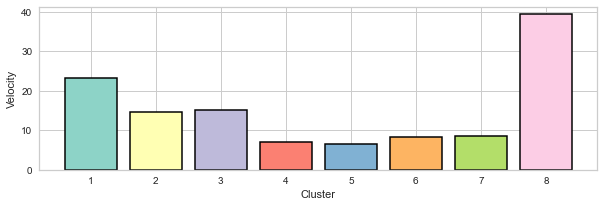

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x = np.arange(K_value)
clusters = clusters_total.index
values = vel_values
colors = sns.color_palette('Set3', len(x))

plt.figure(figsize=(10,3))
plt.bar(x, values, color=colors, edgecolor='black', alpha=1, linewidth=1.5)
# plt.bar(x, values, color=colors, edgecolor='black', alpha=1, linewidth=1.0, width=clusters_width)

plt.xticks(x, clusters)
plt.xlabel('Cluster')
plt.ylabel('Velocity')

plt.show()

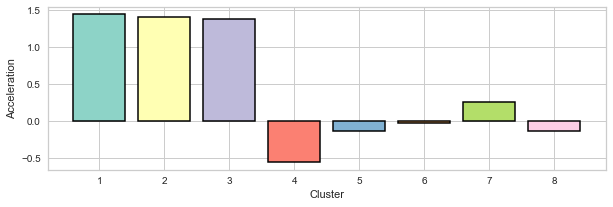

In [100]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(K_value)
clusters = clusters_total.index
values = acc_values
colors = sns.color_palette('Set3', len(x))

plt.figure(figsize=(10,3))
plt.bar(x, values, color=colors, edgecolor='black', alpha=1, linewidth=1.5)
# plt.bar(x, values, color=colors, edgecolor='black', alpha=1, linewidth=1.0, width=clusters_width)

plt.xticks(x, clusters)
plt.xlabel('Cluster')
plt.ylabel('Acceleration')

plt.show()

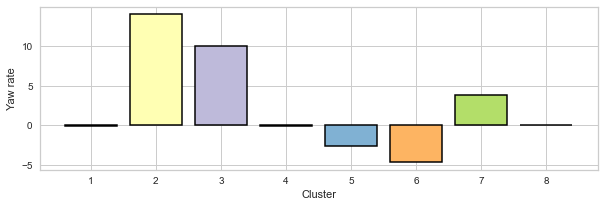

In [101]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(K_value)
clusters = clusters_total.index
values = yaw_values
colors = sns.color_palette('Set3', len(x))

plt.figure(figsize=(10,3))
plt.bar(x, values, color=colors, edgecolor='black', alpha=1, linewidth=1.5)
# plt.bar(x, values, color=colors, edgecolor='black', alpha=1, linewidth=1.0, width=clusters_width)

plt.xticks(x, clusters)
plt.xlabel('Cluster')
plt.ylabel('Yaw rate')

plt.show()

### (2) Scatter Plot

- #### 전체 cluster

C:\Users\tactics\anaconda3\lib\site-packages\matplotlib\collections.py:1053: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if num == "auto":


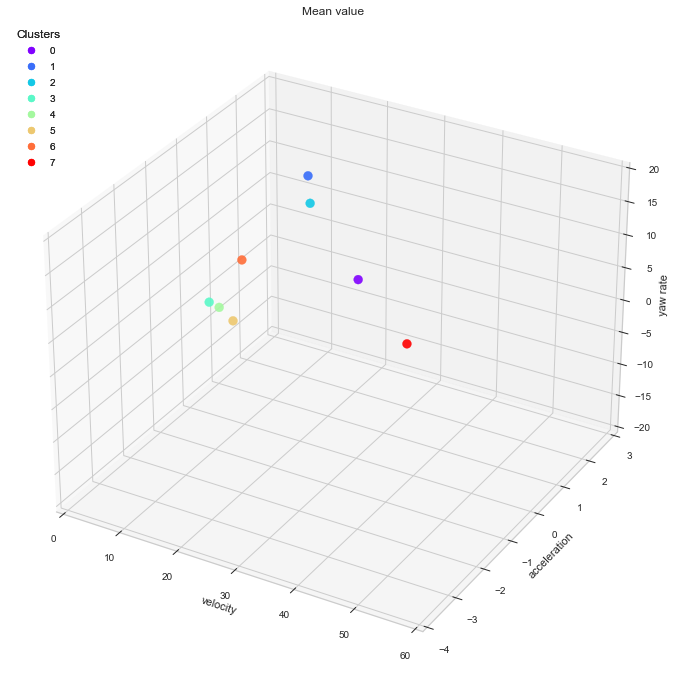

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

x = clusters_total['velocity']
y = clusters_total['acceleration']
z = clusters_total['yaw rate']

color = np.arange(len(clusters_total))

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, marker='o', s=80, c=color, cmap='rainbow', alpha=0.9)

legend1 = ax.legend(*scatter.legend_elements(num=color),
                   loc="upper left", title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('velocity')
ax.set_ylabel('acceleration')
ax.set_zlabel('yaw rate')

ax.set_xlim(0, 60)
ax.set_ylim(-4, 3)
ax.set_zlim(-20, 20)


plt.title("Mean value")
plt.show()

- #### 각 cluster에 해당하는 데이터
    - ##### Driving Event (15X3) -> (1X3)
    - ##### 15초 간 데이터를 평균 내어 1초 단위로 축소

In [103]:
DE_df

,driving event data(15X3),idx
0,"[[0.0, 0.0, 3.0], [0.0, 0.0, 9.0], [0.0, 0.0, ...",0
1,"[[0.0, 0.0, 9.0], [0.0, 0.0, 9.0], [0.0, 0.0, ...",1
2,"[[0.0, 0.0, 9.0], [0.0, 0.0, -247.0], [0.0, 0....",2
3,"[[0.0, 0.0, -247.0], [0.0, 0.0, 269.0], [0.0, ...",3
4,"[[0.0, 0.0, 269.0], [0.0, 0.0, -269.0], [0.0, ...",4
...,...,...
39860,"[[10.0, -6.0, 8.0], [5.0, -5.0, 5.0], [0.0, -5...",39860
39861,"[[5.0, -5.0, 5.0], [0.0, -5.0, 7.0], [0.0, 0.0...",39861
39862,"[[8.0, -4.0, 3.0], [5.0, -3.0, 3.0], [3.0, -2....",39862
39863,"[[5.0, -3.0, 3.0], [3.0, -2.0, -355.0], [0.0, ...",39863


In [104]:
col1 = [DE_df['driving event data(15X3)'][i][:,0].mean() for i in range(len(DE_df))]
col2 = [DE_df['driving event data(15X3)'][i][:,1].mean() for i in range(len(DE_df))]
col3 = [DE_df['driving event data(15X3)'][i][:,2].mean() for i in range(len(DE_df))]

In [105]:
DE_df_2 = pd.DataFrame({'velocity(avg)' : col1, 'acceleration(avg)' : col2, 'yaw rate(avg)' : col3})
DE_df_2['idx'] = DE_df['idx']
DE_df_2

,velocity(avg),acceleration(avg),yaw rate(avg),idx
0,0.000000,0.000000,-15.066667,0
1,0.000000,0.000000,0.400000,1
2,0.000000,0.000000,0.000000,2
3,0.000000,0.000000,-0.400000,3
4,0.000000,0.000000,0.000000,4
...,...,...,...,...
39860,2.866667,-0.266667,-3.133333,39860
39861,3.066667,0.200000,-3.066667,39861
39862,1.066667,-0.800000,-23.200000,39862
39863,0.533333,-0.533333,-0.466667,39863


In [106]:
clusters_3D = pd.DataFrame()
cluster_num = 0

for key in cluster_dic.keys():
    total_df = DE_df_2.iloc[cluster_dic[key]]
    total_df.reset_index(drop=True, inplace=True)
    total_df['cluster'] = cluster_num
    cluster_num += 1
    
    clusters_3D = pd.concat([clusters_3D, total_df], ignore_index=True)
    
clusters_3D

C:\Users\tactics\AppData\Local\Temp/ipykernel_14172/2253993498.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['cluster'] = cluster_num


,velocity(avg),acceleration(avg),yaw rate(avg),idx,cluster
0,14.600000,2.200000,4.533333,25,0
1,16.933333,2.333333,0.000000,26,0
2,19.400000,2.466667,-2.333333,27,0
3,21.866667,2.466667,4.466667,28,0
4,24.266667,2.400000,4.466667,29,0
...,...,...,...,...,...
39860,48.200000,0.400000,0.266667,39811,7
39861,35.400000,1.133333,-0.066667,39838,7
39862,36.266667,0.866667,0.733333,39839,7
39863,37.466667,0.533333,0.800000,39840,7


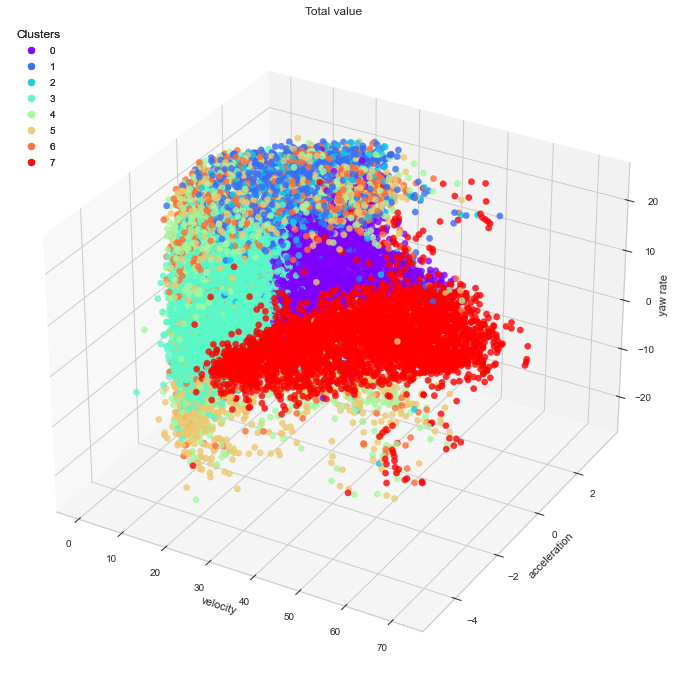

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

x = clusters_3D['velocity(avg)']
y = clusters_3D['acceleration(avg)']
z = clusters_3D['yaw rate(avg)']

color = clusters_3D['cluster']

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, marker='o', alpha=0.8, s=40, cmap='rainbow', c=color) # cmap : Set3/tab20/hsv

legend1 = ax.legend(*scatter.legend_elements(num=len(color.value_counts().sort_index())),
                    loc="upper left", title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('velocity')
ax.set_ylabel('acceleration')
ax.set_zlabel('yaw rate')

plt.title("Total value")
plt.show()

#### 데이터 축소
- ##### threshold 설정

In [108]:
# 8~12
threshold = 5

In [109]:
clusters_3D_2 = clusters_3D

In [110]:
import math

for i in range(len(clusters_3D)):
    C = int(clusters_3D.iloc[i]['cluster'])
    V, A, Y = clusters_3D[clusters_3D['cluster'] == C][['velocity(avg)', 'acceleration(avg)', 'yaw rate(avg)']].mean().values
    
    if (math.sqrt((clusters_3D['velocity(avg)'][i]-V)**2 + \
                  (clusters_3D['acceleration(avg)'][i]-A)**2 + \
                  (clusters_3D['yaw rate(avg)'][i]-Y)**2)) > threshold:
        clusters_3D_2 = clusters_3D_2.drop(i)
        
clusters_3D_2.reset_index(drop=True, inplace=True)

In [111]:
clusters_3D_2

,velocity(avg),acceleration(avg),yaw rate(avg),idx,cluster
0,19.400000,2.466667,-2.333333,27,0
1,21.866667,2.466667,4.466667,28,0
2,24.266667,2.400000,4.466667,29,0
3,26.400000,2.133333,0.933333,30,0
4,28.133333,1.733333,0.466667,31,0
...,...,...,...,...,...
13645,40.333333,0.133333,1.333333,39001,7
13646,35.400000,1.133333,-0.066667,39838,7
13647,36.266667,0.866667,0.733333,39839,7
13648,37.466667,0.533333,0.800000,39840,7


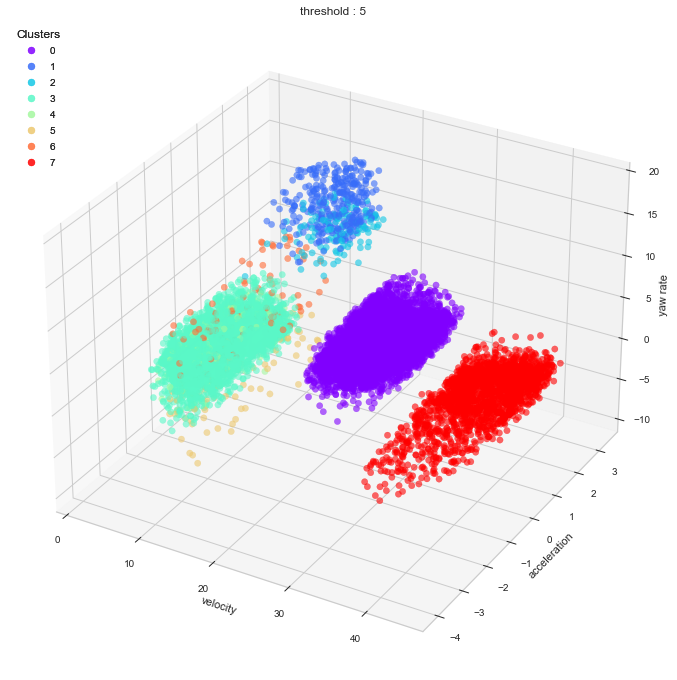

In [112]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

x = clusters_3D_2['velocity(avg)']
y = clusters_3D_2['acceleration(avg)']
z = clusters_3D_2['yaw rate(avg)']

color = clusters_3D_2['cluster']

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, marker='o', alpha=0.6, s=40, cmap='rainbow', c=color) # cmap : Set3/tab20/hsv

legend1 = ax.legend(*scatter.legend_elements(num=len(color.value_counts().sort_index())),
                    loc="upper left", title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('velocity')
ax.set_ylabel('acceleration')
ax.set_zlabel('yaw rate')

plt.title(f"threshold : {threshold}")
plt.show()

In [113]:
for i in range(K_value):
    print(f"cluster{i} ")
    print(f"축소 전 : {len(clusters_3D[clusters_3D['cluster']==i])}개")
    print(f"축소 후 : {len(clusters_3D_2[clusters_3D_2['cluster']==i])}개\n")

cluster0 
축소 전 : 15290개
축소 후 : 7501개

cluster1 
축소 전 : 1781개
축소 후 : 323개

cluster2 
축소 전 : 952개
축소 후 : 122개

cluster3 
축소 전 : 9111개
축소 후 : 3057개

cluster4 
축소 전 : 2628개
축소 후 : 446개

cluster5 
축소 전 : 2987개
축소 후 : 140개

cluster6 
축소 전 : 1789개
축소 후 : 98개

cluster7 
축소 전 : 5327개
축소 후 : 1963개



# 운전자 평가

- #### 새로운 운전자 데이터 사용(~1116.txt)
- #### 전처리 - 불일치도 계산 - DE 추출 - 차원축소 - Kmeans predict
- #### 스코어링 및 운전자 평가

In [114]:
input_file = open(dir_+'20210701_░ц▒т71╣┘1116.TXT','r', encoding='cp949')
data = input_file.read()

In [115]:
print(f"file info :\n{data[:76]}")

file info :
############ODR-1200KMJTA18EPBC01009811경기71바11161238100831######Not_00000000


In [116]:
row = int((len(data)-76)/68)
print(f"row :\n{row}")

row :
44630


In [117]:
# df 구성
df = pd.DataFrame(columns=['daily_dist','total_dist','event_date','velocity(km/h)',
                           'RPM','break_on','lat','lon','angle','acc_x','acc_y','status'])
i=0
while True:
    line = data[76+i*68:144+i*68]
    if line=='':break
    df.loc[i]=[line[:4],line[4:11],line[11:25],line[25:28],line[28:32],
               line[32:33],line[33:42],line[42:51],line[51:54],line[54:60],line[60:66],line[66:68]]
    i+=1
    if i%40000==0:break

In [118]:
# dtype 변경
for i in df.index:
    try:df.loc[i,['velocity(km/h)','RPM','angle','acc_x','acc_y']].astype(float)
    except:df.loc[i]=(df.loc[i-1].astype(float)+df.loc[i+1].astype(float))/2

In [119]:
# 요레이트, 가속도 컬럼 생성
df['yaw_rate'] = None
df['acceleration'] = None
for idx1,idx2 in zip(df.index[:-1],df.index[1:]):
    yaw1,vel1 = df.loc[idx1,['angle','velocity(km/h)']]
    yaw2,vel2 = df.loc[idx2,['angle','velocity(km/h)']]
    df.loc[idx2,'yaw_rate'] = float(yaw2)-float(yaw1)
    df.loc[idx2,'acceleration'] = float(vel2)-float(vel1)

In [120]:
# 불일치도 계산(10분)
start = time()

np.random.seed(1)

data = df[['velocity(km/h)','acceleration','yaw_rate']].astype(float).values[1:]

input_list = range(len(data)-30)
result = ray.get([function.remote(i,data) for i in input_list])
result = [ray.get(i) for i in result]+[0]*15

end = time()
print(f"{int((end-start)/60)}분")

22분


In [121]:
zero_df = pd.DataFrame({'dissim' : [0 for i in range(1+15)]})
result_df = pd.DataFrame({'dissim' : result})
dissim_df = pd.concat([zero_df, result_df], ignore_index = True)

In [122]:
# 불일치도 df 삽입
new_df = df.copy()
new_df = pd.concat([new_df, dissim_df], axis=1)
new_df.head()

,daily_dist,total_dist,event_date,velocity(km/h),RPM,break_on,lat,lon,angle,acc_x,acc_y,status,yaw_rate,acceleration,dissim
0,0000,0191903,21070104392100,000,0680,1,126896076,037420969,000,+008.6,-001.6,00,None,None,0.0
1,0000,0191903,21070104392200,000,0660,1,126896076,037420969,000,+008.7,-001.9,00,0.0,0.0,0.0
2,0000,0191903,21070104392300,000,0680,1,126896076,037420969,000,+008.3,-001.7,00,0.0,0.0,0.0
3,0000,0191903,21070104392400,000,0660,1,126896076,037420969,000,+008.6,-001.6,00,0.0,0.0,0.0
4,0000,0191903,21070104392500,000,0680,1,126896076,037420969,000,+008.4,-001.5,00,0.0,0.0,0.0


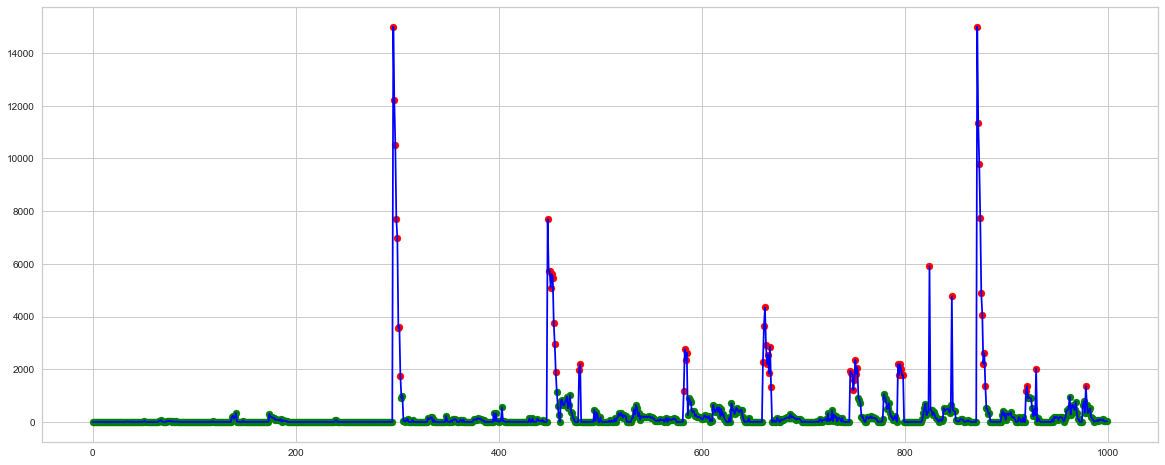

In [123]:
# 0~1000초 간 driving event 발생 지점
y = np.array(result[:1000])
x = np.arange(len(result[:1000]))
threshold = np.quantile(result,0.95)

plt.figure(figsize=(20,8))
plt.plot(x, y, color='blue')

below_threshold = y < threshold
plt.scatter(x[below_threshold], y[below_threshold], color='green') 

above_threshold = np.logical_not(below_threshold)
plt.scatter(x[above_threshold], y[above_threshold], color='red')

In [124]:
threshold

1155.578377997485

In [125]:
# driving event
detected = []
for idx in new_df.index:
    if new_df.loc[idx,'dissim']>=threshold:
        values = new_df.loc[idx:idx+14,['velocity(km/h)','acceleration','yaw_rate']].astype(float).values.tolist()
        detected.append(values)

In [126]:
# 전체 데이터의 5%
driving_event = np.array(detected)
len(driving_event)

2000

In [127]:
# 차원축소
dataset = TensorDataset(driving_event)
train_dataset,val_dataset = torch.utils.data.dataset.random_split(dataset,[int(len(dataset)*0.8),len(dataset)-int(len(dataset)*0.8)])

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64,shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=64)

In [128]:
epochs = 50000
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoEncoder(device, 45, 64, 30).to(device)

Loss = nn.MSELoss()
patience = 100
sparsity_param = 0.1

l2_weight = 0.001 
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=l2_weight)
scheduler = optim.lr_scheduler.LambdaLR(optimizer=optimizer, lr_lambda=lambda epoch: 1**epoch)

In [129]:
train_losses = []
val_losses = []
for epoch in range(epochs):
    train_epoch_loss,model = train(model,Loss,optimizer,train_dataloader, scheduler, sparsity_param)
    val_epoch_loss,model = validate(model,Loss,val_dataloader)

    train_losses.append(train_epoch_loss.item())
    val_losses.append(val_epoch_loss.item())
    if epoch%500==0:
        print(f'epoch {epoch} | train loss : {train_epoch_loss:.2f} , val loss : {val_epoch_loss:.2f}')
        print('-'*70)
    if min(val_losses)==val_epoch_loss:
        best_model = model
        best_epoch = epoch
        best_loss = train_epoch_loss,val_epoch_loss
    if epoch>patience and min(val_losses[-patience:])==val_losses[-patience]:
        print(f'best epoch {best_epoch} | train loss : {best_loss[0]:.2f} , val loss : {best_loss[1]:.2f}')
        break

C:\Users\tactics\anaconda3\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch 0 | train loss : 1123.12 , val loss : 1090.77
----------------------------------------------------------------------
epoch 500 | train loss : 45.64 , val loss : 120.77
----------------------------------------------------------------------
epoch 1000 | train loss : 12.86 , val loss : 51.69
----------------------------------------------------------------------
epoch 1500 | train loss : 9.42 , val loss : 37.92
----------------------------------------------------------------------
best epoch 1757 | train loss : 8.19 , val loss : 33.53


In [130]:
# 차원 축소 결과 확인
# 15X3 => 30
best_model.get_codes(list(iter(train_dataloader))[0])[0]

tensor([0.3300, 0.2228, 0.2528, 0.3803, 0.2016, 0.2635, 0.3698, 0.6722, 0.4628,
        0.4116, 0.2415, 0.2206, 0.2395, 0.3223, 0.2461, 0.2302, 0.4602, 0.1480,
        0.6702, 0.3450, 0.2461, 0.2315, 0.4620, 0.2427, 0.1745, 0.3813, 0.1845,
        0.3735, 0.3729, 0.2352], device='cuda:0', grad_fn=<SelectBackward0>)

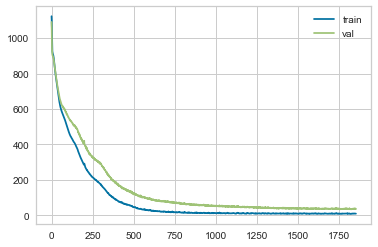

In [131]:
# 모델 수렴
plt.figure(figsize=(6,4))
plt.plot(train_losses,label='train')
plt.plot(val_losses,label='val')
plt.legend()
plt.show()

In [132]:
# 전체 driving event 차원 축소
total_dataloader = torch.utils.data.DataLoader(dataset, batch_size=64)
list(iter(total_dataloader))[0].shape

torch.Size([64, 15, 3])

In [133]:
result1 = []
for batch_X in total_dataloader:
    result1.append(best_model.get_codes(batch_X))

In [134]:
result2 = []
for x in result1:
    for y in x:
        result2.append(y)

In [135]:
# tensor => array 변환
driving_event_DR = np.array([x.cpu().detach().numpy() for x in result2])
driving_event_DR.shape

(2000, 30)

In [136]:
# 차원축소 전 데이터(15X3)
driving_event[777]

array([[36.,  2., -1.],
       [39.,  3., -1.],
       [40.,  1.,  1.],
       [43.,  3., -2.],
       [45.,  2.,  0.],
       [45.,  0.,  2.],
       [48.,  3.,  3.],
       [48.,  0.,  2.],
       [50.,  2.,  1.],
       [51.,  1.,  3.],
       [52.,  1.,  0.],
       [52.,  0.,  1.],
       [50., -2.,  1.],
       [43., -7.,  1.],
       [36., -7.,  1.]])

In [137]:
# 차원축소 후 데이터(30)
driving_event_DR[777]

array([0.31185776, 0.23795989, 0.31225556, 0.27828825, 0.14712977,
       0.29733709, 0.5594463 , 0.69876677, 0.4412868 , 0.59534454,
       0.232014  , 0.27075732, 0.3004079 , 0.29756886, 0.18327674,
       0.2593693 , 0.44954842, 0.23035689, 0.57471657, 0.4137309 ,
       0.19620758, 0.32990253, 0.47649723, 0.18622905, 0.15132284,
       0.4465934 , 0.15550637, 0.62285376, 0.70246154, 0.20339802],
      dtype=float32)

In [138]:
# 차원 축소 DE 데이터프레임 생성
data_changed_DE_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(data_changed_DE_df)
new_df

,driving event data(30),idx
0,"[0.55176085, 0.22684215, 0.19949894, 0.5260462...",0
1,"[0.17886272, 0.22709194, 0.2576584, 0.24553958...",1
2,"[0.20930845, 0.26476344, 0.2286287, 0.25313747...",2
3,"[0.22364601, 0.21144593, 0.26850682, 0.2266824...",3
4,"[0.22302528, 0.20463319, 0.3599701, 0.2018732,...",4
...,...,...
1995,"[0.18575734, 0.24405098, 0.32672888, 0.2518492...",1995
1996,"[0.26295996, 0.24562055, 0.2785515, 0.2908173,...",1996
1997,"[0.15763088, 0.97347283, 0.13190183, 0.7773769...",1997
1998,"[0.0190315, 0.03759514, 0.5773468, 0.44478807,...",1998


In [139]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)
new_df

,driving event data(30),idx,cluster
0,"[0.55176085, 0.22684215, 0.19949894, 0.5260462...",0,1
1,"[0.17886272, 0.22709194, 0.2576584, 0.24553958...",1,0
2,"[0.20930845, 0.26476344, 0.2286287, 0.25313747...",2,0
3,"[0.22364601, 0.21144593, 0.26850682, 0.2266824...",3,0
4,"[0.22302528, 0.20463319, 0.3599701, 0.2018732,...",4,0
...,...,...,...
1995,"[0.18575734, 0.24405098, 0.32672888, 0.2518492...",1995,3
1996,"[0.26295996, 0.24562055, 0.2785515, 0.2908173,...",1996,3
1997,"[0.15763088, 0.97347283, 0.13190183, 0.7773769...",1997,6
1998,"[0.0190315, 0.03759514, 0.5773468, 0.44478807,...",1998,5


In [140]:
cluster_dic = {}
    
for i in range(K_value):
    cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])
    
cluster_dic.keys()

dict_keys(['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7'])

In [141]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

[129, 55, 37, 1205, 101, 342, 130, 1]

In [142]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

[12, 8, 12, 2, 4, 2, 4, 12]

In [143]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

print(f"DRIVER SCORE 1 : {score_1}")

DRIVER SCORE 1 : 6462


In [144]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

[8.28, 10.07, 8.87, 2.58, 3.12, 4.39, 4.25, 13.27]

In [145]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

print(f"DRIVER SCORE 2 : {score_2}")

DRIVER SCORE 2 : 7441.33


In [146]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [147]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

DRIVER BEHAVIOR : 

              cluster_3
velocity_eval       Low
acc_safety       danger
steer_safety     safety


              cluster_5
velocity_eval       Low
acc_safety       safety
steer_safety     danger


              cluster_6
velocity_eval       Mid
acc_safety       safety
steer_safety     danger




In [148]:
driver_1 = {
    'score_1' : int(score_1),
    'score_2' : int(score_2),
    'related_cluster' : related_cluster
}

In [149]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

print(f"DRIVER SCORE 3 : {score_3}")

DRIVER SCORE 3 : 5581


# 운전자 평가2

- #### 새로운 운전자 데이터 사용(~1120.txt)

In [150]:
input_file = open(dir_+'20210701_░ц▒т71╣┘1120.TXT','r', encoding='cp949')
data = input_file.read()

In [151]:
print(f"file info :\n{data[:76]}")

file info :
############ODR-12001111111111111111111경기71바11201238100831######Not_00000000


In [152]:
row = int((len(data)-76)/68)
print(f"row :\n{row}")

row :
50995


In [153]:
# df2 구성
df2 = pd.DataFrame(columns=['daily_dist','total_dist','event_date','velocity(km/h)',
                           'RPM','break_on','lat','lon','angle','acc_x','acc_y','status'])
i=0
while True:
    line = data[76+i*68:144+i*68]
    if line=='':break
    df2.loc[i]=[line[:4],line[4:11],line[11:25],line[25:28],line[28:32],
               line[32:33],line[33:42],line[42:51],line[51:54],line[54:60],line[60:66],line[66:68]]
    i+=1
    if i%40000==0:break

In [154]:
# dtype 변경
for i in df2.index:
    try:df2.loc[i,['velocity(km/h)','RPM','angle','acc_x','acc_y']].astype(float)
    except:df2.loc[i]=(df2.loc[i-1].astype(float)+df2.loc[i+1].astype(float))/2

In [155]:
# 요레이트, 가속도 컬럼 생성
df2['yaw_rate'] = None
df2['acceleration'] = None
for idx1,idx2 in zip(df2.index[:-1],df2.index[1:]):
    yaw1,vel1 = df2.loc[idx1,['angle','velocity(km/h)']]
    yaw2,vel2 = df2.loc[idx2,['angle','velocity(km/h)']]
    df2.loc[idx2,'yaw_rate'] = float(yaw2)-float(yaw1)
    df2.loc[idx2,'acceleration'] = float(vel2)-float(vel1)

In [156]:
# 불일치도 계산(10분)
start = time()

np.random.seed(1)

data = df2[['velocity(km/h)','acceleration','yaw_rate']].astype(float).values[1:]

input_list = range(len(data)-30)
result2 = ray.get([function.remote(i,data) for i in input_list])
result2 = [ray.get(i) for i in result2]+[0]*15

end = time()
print(f"{int((end-start)/60)}분")

(function pid=26616) C:\Users\tactics\anaconda3\lib\site-packages\densratio\RuLSIF.py:118: RuntimeWarning: divide by zero encountered in log
(function pid=26616)   divergence = log(g_x).sum(axis=0) / n


(scheduler +11h29m20s) Tip: use `ray status` to view detailed cluster status. To disable these messages, set RAY_SCHEDULER_EVENTS=0.
(scheduler +11h29m20s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(scheduler +11h30m13s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(scheduler +11h31m54s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(scheduler +11h35m25s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is l

In [157]:
zero_df = pd.DataFrame({'dissim' : [0 for i in range(1+15)]})
result_df = pd.DataFrame({'dissim' : result2})
dissim_df = pd.concat([zero_df, result_df], ignore_index = True)

In [158]:
# 불일치도 df 삽입
new_df = df2.copy()
new_df = pd.concat([new_df, dissim_df], axis=1)
new_df.head()

,daily_dist,total_dist,event_date,velocity(km/h),RPM,break_on,lat,lon,angle,acc_x,acc_y,status,yaw_rate,acceleration,dissim
0,0000,0149184,21070105400200,000,1280,1,126958301,037303166,000,-000.7,-000.7,00,None,None,0.0
1,0000,0149184,21070105400300,000,0800,1,126958301,037303166,000,-000.4,+000.2,00,0.0,0.0,0.0
2,0000,0149184,21070105400400,000,0700,1,126958301,037303166,000,-000.8,+000.0,00,0.0,0.0,0.0
3,0000,0149184,21070105400500,000,1040,1,126958301,037303166,000,-000.4,-000.4,00,0.0,0.0,0.0
4,0000,0149184,21070105400600,000,1400,1,126958301,037303166,000,-000.2,-000.1,00,0.0,0.0,0.0


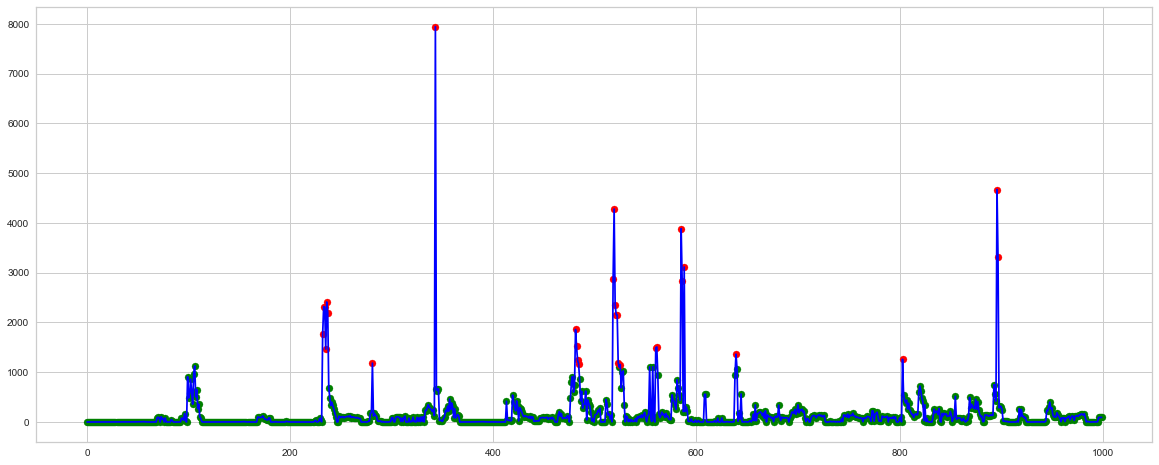

In [159]:
# 0~1000초 간 driving event 발생 지점
y = np.array(result2[:1000])
x = np.arange(len(result2[:1000]))
threshold = np.quantile(result2,0.95)

plt.figure(figsize=(20,8))
plt.plot(x, y, color='blue')

below_threshold = y < threshold
plt.scatter(x[below_threshold], y[below_threshold], color='green') 

above_threshold = np.logical_not(below_threshold)
plt.scatter(x[above_threshold], y[above_threshold], color='red')

In [160]:
threshold

1149.9782629021083

In [161]:
# driving event
detected = []
for idx in new_df.index:
    if new_df.loc[idx,'dissim']>=threshold:
        values = new_df.loc[idx:idx+14,['velocity(km/h)','acceleration','yaw_rate']].astype(float).values.tolist()
        detected.append(values)

In [162]:
# 전체 데이터의 5%
driving_event = np.array(detected)
len(driving_event)

2000

In [163]:
# 차원축소
dataset = TensorDataset(driving_event)
train_dataset,val_dataset = torch.utils.data.dataset.random_split(dataset,[int(len(dataset)*0.8),len(dataset)-int(len(dataset)*0.8)])

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64,shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=64)

In [164]:
epochs = 50000
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoEncoder(device, 45, 64, 30).to(device)

Loss = nn.MSELoss()
patience = 100
sparsity_param = 0.1

l2_weight = 0.001 
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=l2_weight)
scheduler = optim.lr_scheduler.LambdaLR(optimizer=optimizer, lr_lambda=lambda epoch: 1**epoch)

In [165]:
train_losses = []
val_losses = []
for epoch in range(epochs):
    train_epoch_loss,model = train(model,Loss,optimizer,train_dataloader, scheduler, sparsity_param)
    val_epoch_loss,model = validate(model,Loss,val_dataloader)

    train_losses.append(train_epoch_loss.item())
    val_losses.append(val_epoch_loss.item())
    if epoch%500==0:
        print(f'epoch {epoch} | train loss : {train_epoch_loss:.2f} , val loss : {val_epoch_loss:.2f}')
        print('-'*70)
    if min(val_losses)==val_epoch_loss:
        best_model = model
        best_epoch = epoch
        best_loss = train_epoch_loss,val_epoch_loss
    if epoch>patience and min(val_losses[-patience:])==val_losses[-patience]:
        print(f'best epoch {best_epoch} | train loss : {best_loss[0]:.2f} , val loss : {best_loss[1]:.2f}')
        break

C:\Users\tactics\anaconda3\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch 0 | train loss : 1059.04 , val loss : 1379.81
----------------------------------------------------------------------
epoch 500 | train loss : 36.50 , val loss : 142.30
----------------------------------------------------------------------
epoch 1000 | train loss : 11.29 , val loss : 66.73
----------------------------------------------------------------------
epoch 1500 | train loss : 8.69 , val loss : 55.04
----------------------------------------------------------------------
best epoch 1443 | train loss : 8.92 , val loss : 52.85


In [166]:
# 차원 축소 결과 확인
# 15X3 => 30
best_model.get_codes(list(iter(train_dataloader))[0])[0]

tensor([0.2548, 0.3382, 0.3646, 0.3241, 0.3949, 0.5000, 0.2054, 0.4141, 0.4467,
        0.4800, 0.4199, 0.3843, 0.4305, 0.3657, 0.2276, 0.2393, 0.3596, 0.6140,
        0.3769, 0.2568, 0.2963, 0.2610, 0.2787, 0.3995, 0.5140, 0.3826, 0.2872,
        0.4854, 0.3226, 0.4184], device='cuda:0', grad_fn=<SelectBackward0>)

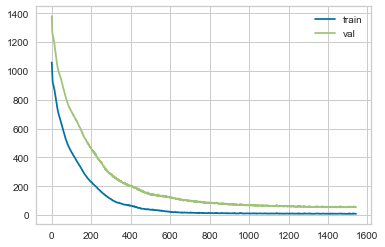

In [167]:
# 모델 수렴
plt.figure(figsize=(6,4))
plt.plot(train_losses,label='train')
plt.plot(val_losses,label='val')
plt.legend()
plt.show()

In [168]:
# 전체 driving event 차원 축소
total_dataloader = torch.utils.data.DataLoader(dataset, batch_size=64)
list(iter(total_dataloader))[0].shape

torch.Size([64, 15, 3])

In [169]:
result1 = []
for batch_X in total_dataloader:
    result1.append(best_model.get_codes(batch_X))

In [170]:
result2 = []
for x in result1:
    for y in x:
        result2.append(y)

In [171]:
# tensor => array 변환
driving_event_DR = np.array([x.cpu().detach().numpy() for x in result2])
driving_event_DR.shape

(2000, 30)

In [172]:
# 차원축소 전 데이터(15X3)
driving_event[777]

array([[  1.,   1.,  -3.],
       [  4.,   3., -75.],
       [  9.,   5., -16.],
       [ 12.,   3.,  -8.],
       [ 14.,   2.,  -1.],
       [ 13.,  -1.,   0.],
       [ 16.,   3.,  -1.],
       [ 17.,   1.,  -2.],
       [ 19.,   2.,  -2.],
       [ 22.,   3.,   1.],
       [ 25.,   3.,   1.],
       [ 26.,   1.,  -1.],
       [ 26.,   0.,   0.],
       [ 26.,   0.,   0.],
       [ 28.,   2.,  -1.]])

In [173]:
# 차원축소 후 데이터(30)
driving_event_DR[777]

array([0.30931863, 0.32856548, 0.31790194, 0.38287097, 0.4402571 ,
       0.56250685, 0.19327444, 0.42679465, 0.5172108 , 0.4205333 ,
       0.45284677, 0.4695292 , 0.3977197 , 0.3671791 , 0.19950926,
       0.27128217, 0.31211573, 0.6046857 , 0.3849699 , 0.2430549 ,
       0.31526256, 0.22400913, 0.23725583, 0.29731765, 0.48076507,
       0.33502948, 0.32185858, 0.47412607, 0.42711306, 0.4544015 ],
      dtype=float32)

In [174]:
# 차원 축소 DE 데이터프레임 생성
data_changed_DE_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(data_changed_DE_df)
new_df

,driving event data(30),idx
0,"[0.7118083, 0.13107014, 0.38937688, 0.8419712,...",0
1,"[0.22854388, 0.46190563, 0.2892365, 0.33474147...",1
2,"[0.37377325, 0.3323007, 0.4980656, 0.52418214,...",2
3,"[0.27559096, 0.34794214, 0.39601436, 0.4094758...",3
4,"[0.28449795, 0.34006736, 0.38556743, 0.4493993...",4
...,...,...
1995,"[0.3258347, 0.42926344, 0.30517787, 0.35439196...",1995
1996,"[0.3028059, 0.39137945, 0.22772363, 0.24467705...",1996
1997,"[0.31627637, 0.38857067, 0.25133875, 0.2648562...",1997
1998,"[0.34452954, 0.3244333, 0.2667885, 0.27625105,...",1998


In [175]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)
new_df

,driving event data(30),idx,cluster
0,"[0.7118083, 0.13107014, 0.38937688, 0.8419712,...",0,5
1,"[0.22854388, 0.46190563, 0.2892365, 0.33474147...",1,4
2,"[0.37377325, 0.3323007, 0.4980656, 0.52418214,...",2,5
3,"[0.27559096, 0.34794214, 0.39601436, 0.4094758...",3,4
4,"[0.28449795, 0.34006736, 0.38556743, 0.4493993...",4,5
...,...,...,...
1995,"[0.3258347, 0.42926344, 0.30517787, 0.35439196...",1995,6
1996,"[0.3028059, 0.39137945, 0.22772363, 0.24467705...",1996,6
1997,"[0.31627637, 0.38857067, 0.25133875, 0.2648562...",1997,4
1998,"[0.34452954, 0.3244333, 0.2667885, 0.27625105,...",1998,4


In [176]:
cluster_dic = {}
    
for i in range(K_value):
    cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])
    
cluster_dic.keys()

KeyError: 7

In [ ]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

In [ ]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

In [ ]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

print(f"DRIVER SCORE 1 : {score_1}")

In [ ]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

In [ ]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

print(f"DRIVER SCORE 2 : {score_2}")

In [ ]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [ ]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

In [ ]:
driver_2 = {
    'score_1' : int(score_1),
    'score_2' : int(score_2),
    'related_cluster' : related_cluster
}

In [ ]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

print(f"DRIVER SCORE 3 : {score_3}")

# 운전자 평가3

- #### 새로운 운전자 데이터 사용(~1123.txt)

- '20210701_░ц▒т71╣┘1125.txt'
- '20210701_░ц▒т71╣┘1127.txt'

In [ ]:
input_file = open(dir_+'20210701_░ц▒т71╣┘1123.TXT','r', encoding='cp949')
data = input_file.read()

In [ ]:
print(f"file info :\n{data[:76]}")

In [ ]:
row = int((len(data)-76)/68)
print(f"row :\n{row}")

In [ ]:
# df3 구성
df3 = pd.DataFrame(columns=['daily_dist','total_dist','event_date','velocity(km/h)',
                           'RPM','break_on','lat','lon','angle','acc_x','acc_y','status'])
i=0
while True:
    line = data[76+i*68:144+i*68]
    if line=='':break
    df3.loc[i]=[line[:4],line[4:11],line[11:25],line[25:28],line[28:32],
               line[32:33],line[33:42],line[42:51],line[51:54],line[54:60],line[60:66],line[66:68]]
    i+=1
    if i%40000==0:break

In [ ]:
# dtype 변경
for i in df3.index:
    try:df3.loc[i,['velocity(km/h)','RPM','angle','acc_x','acc_y']].astype(float)
    except:df3.loc[i]=(df3.loc[i-1].astype(float)+df3.loc[i+1].astype(float))/2

In [ ]:
# 요레이트, 가속도 컬럼 생성
df3['yaw_rate'] = None
df3['acceleration'] = None
for idx1,idx2 in zip(df3.index[:-1],df3.index[1:]):
    yaw1,vel1 = df3.loc[idx1,['angle','velocity(km/h)']]
    yaw2,vel2 = df3.loc[idx2,['angle','velocity(km/h)']]
    df3.loc[idx2,'yaw_rate'] = float(yaw2)-float(yaw1)
    df3.loc[idx2,'acceleration'] = float(vel2)-float(vel1)

In [ ]:
# 불일치도 계산(30분)
start = time()

np.random.seed(1)

data = df3[['velocity(km/h)','acceleration','yaw_rate']].astype(float).values[1:]

input_list = range(len(data)-30)
result3 = ray.get([function.remote(i,data) for i in input_list])
result3 = [ray.get(i) for i in result3]+[0]*15

end = time()
print(f"{int((end-start)/60)}분")

In [ ]:
zero_df = pd.DataFrame({'dissim' : [0 for i in range(1+15)]})
result_df = pd.DataFrame({'dissim' : result3})
dissim_df = pd.concat([zero_df, result_df], ignore_index = True)

In [ ]:
# 불일치도 df 삽입
new_df = df3.copy()
new_df = pd.concat([new_df, dissim_df], axis=1)
new_df.head()

In [ ]:
# 0~1000초 간 driving event 발생 지점
y = np.array(result3[:1000])
x = np.arange(len(result3[:1000]))
threshold = np.quantile(result3,0.95)

plt.figure(figsize=(20,8))
plt.plot(x, y, color='blue')

below_threshold = y < threshold
plt.scatter(x[below_threshold], y[below_threshold], color='green') 

above_threshold = np.logical_not(below_threshold)
plt.scatter(x[above_threshold], y[above_threshold], color='red')

In [ ]:
threshold

In [ ]:
# driving event
detected = []
for idx in new_df.index:
    if new_df.loc[idx,'dissim']>threshold:
        values = new_df.loc[idx:idx+14,['velocity(km/h)','acceleration','yaw_rate']].astype(float).values.tolist()
        detected.append(values)

In [ ]:
# 전체 데이터의 5%
driving_event = np.array(detected)
len(driving_event)

In [ ]:
# 차원축소
dataset = TensorDataset(driving_event)
train_dataset,val_dataset = torch.utils.data.dataset.random_split(dataset,[int(len(dataset)*0.8),len(dataset)-int(len(dataset)*0.8)])

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64,shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=64)

In [ ]:
epochs = 50000
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoEncoder(device, 45, 64, 30).to(device)

Loss = nn.MSELoss()
patience = 100
sparsity_param = 0.1

l2_weight = 0.001 
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=l2_weight)
scheduler = optim.lr_scheduler.LambdaLR(optimizer=optimizer, lr_lambda=lambda epoch: 1**epoch)

In [ ]:
train_losses = []
val_losses = []
for epoch in range(epochs):
    train_epoch_loss,model = train(model,Loss,optimizer,train_dataloader, scheduler, sparsity_param)
    val_epoch_loss,model = validate(model,Loss,val_dataloader)

    train_losses.append(train_epoch_loss.item())
    val_losses.append(val_epoch_loss.item())
    if epoch%500==0:
        print(f'epoch {epoch} | train loss : {train_epoch_loss:.2f} , val loss : {val_epoch_loss:.2f}')
        print('-'*70)
    if min(val_losses)==val_epoch_loss:
        best_model = model
        best_epoch = epoch
        best_loss = train_epoch_loss,val_epoch_loss
    if epoch>patience and min(val_losses[-patience:])==val_losses[-patience]:
        print(f'best epoch {best_epoch} | train loss : {best_loss[0]:.2f} , val loss : {best_loss[1]:.2f}')
        break

In [ ]:
# 차원 축소 결과 확인
# 15X3 => 30
best_model.get_codes(list(iter(train_dataloader))[0])[0]

In [ ]:
# 모델 수렴
plt.figure(figsize=(6,4))
plt.plot(train_losses,label='train')
plt.plot(val_losses,label='val')
plt.legend()
plt.show()

In [ ]:
# 전체 driving event 차원 축소
total_dataloader = torch.utils.data.DataLoader(dataset, batch_size=64)
list(iter(total_dataloader))[0].shape

In [ ]:
result1 = []
for batch_X in total_dataloader:
    result1.append(best_model.get_codes(batch_X))

In [ ]:
result2 = []
for x in result1:
    for y in x:
        result2.append(y)

In [ ]:
# tensor => array 변환
driving_event_DR = np.array([x.cpu().detach().numpy() for x in result2])
driving_event_DR.shape

In [ ]:
# 차원축소 전 데이터(15X3)
driving_event[777]

In [ ]:
# 차원축소 후 데이터(30)
driving_event_DR[777]

In [ ]:
# 차원 축소 DE 데이터프레임 생성
data_changed_DE_df = {
    'driving event data(30)' : [driving_event_DR[i] for i in range(len(driving_event_DR))],
    'idx' : [j for j in range(len(driving_event_DR))]
}

new_df = pd.DataFrame(data_changed_DE_df)
new_df

In [ ]:
# Kmeans predict
new_data_scale = scaler.fit_transform(driving_event_DR)

new_df['cluster'] = kmeans.predict(new_data_scale)
new_df

In [ ]:
cluster_dic = {}
    
for i in range(K_value):
    cluster_dic[f"cluster_{i}"] = list(new_df.groupby('cluster').get_group(i)['idx'])
    
cluster_dic.keys()

In [ ]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

In [ ]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

In [ ]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

print(f"DRIVER SCORE 1 : {score_1}")

In [ ]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

In [ ]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

print(f"DRIVER SCORE 2 : {score_2}")

In [ ]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [ ]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

In [ ]:
driver_3 = {
    'score_1' : int(score_1),
    'score_2' : int(score_2),
    'related_cluster' : related_cluster
}

In [ ]:
# test) cluster 별 위험도 점수 2
cluster_scores2 = test_eval['dangerousness'].values.flatten().tolist()

score_3 = 0
for i in range(K_value):
    score_3 += cluster_scores2[i] * cluster_num[i]

print(f"DRIVER SCORE 3 : {score_3}")

# 운전자 평가 결과 비교

In [ ]:
print(f"[DRIVER 1]\n")
print(f"SCORE : \n\
(1) {driver_1['score_1']}   (2) {driver_1['score_2']}\n")
print(f"BEHAVIOR : ")
for cluster in driver_1['related_cluster'][:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

In [ ]:
print(f"[DRIVER 2]\n")
print(f"SCORE : \n\
(1) {driver_2['score_1']}   (2) {driver_2['score_2']}\n")
print(f"BEHAVIOR : ")
for cluster in driver_2['related_cluster'][:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

In [ ]:
print(f"[DRIVER 3]\n")
print(f"SCORE : \n\
(1) {driver_3['score_1']}   (2) {driver_3['score_2']}\n")
print(f"BEHAVIOR : ")
for cluster in driver_3['related_cluster'][:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

# 안전 운행 데이터

#### 불일치도 중앙 5%

In [ ]:
mid_d = np.quantile(result3,0.475)
mid_u = np.quantile(result3,0.525)
mid_d, mid_u

In [ ]:
y = np.array(result3[:])
x = np.arange(len(result3[:]))

plt.figure(figsize=(20,8))
plt.plot(x, y, color='blue')

mid_threshold = (y > mid_d) & (y < mid_u)
plt.scatter(x[mid_threshold], y[mid_threshold], color='red')

In [ ]:
origin_df = df3.copy()
origin_df = pd.concat([origin_df, dissim_df], axis=1)
origin_df

In [ ]:
# driving event로 분류되지 않은 값들
# 정상적인 운행
not_DE = []
for idx in origin_df.index:
    if ((origin_df.loc[idx,'dissim'] > mid_d) & (origin_df.loc[idx,'dissim'] < mid_u)):
        values = origin_df.loc[idx:idx+14,['velocity(km/h)','acceleration','yaw_rate']].astype(float).values.tolist()
        not_DE.append(values)

In [ ]:
# 전체 데이터의 5%
not_driving_event = np.array(not_DE)
len(not_driving_event)

In [ ]:
# 차원축소
dataset = TensorDataset(not_driving_event)
train_dataset,val_dataset = torch.utils.data.dataset.random_split(dataset,[int(len(dataset)*0.8),len(dataset)-int(len(dataset)*0.8)])

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64,shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=64)

In [ ]:
epochs = 50000
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoEncoder(device, 45, 64, 30).to(device)

Loss = nn.MSELoss()
patience = 100
sparsity_param = 0.1

l2_weight = 0.001 
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=l2_weight)
scheduler = optim.lr_scheduler.LambdaLR(optimizer=optimizer, lr_lambda=lambda epoch: 1**epoch)

In [ ]:
train_losses = []
val_losses = []
for epoch in range(epochs):
    train_epoch_loss,model = train(model,Loss,optimizer,train_dataloader, scheduler, sparsity_param)
    val_epoch_loss,model = validate(model,Loss,val_dataloader)

    train_losses.append(train_epoch_loss.item())
    val_losses.append(val_epoch_loss.item())
    if epoch%500==0:
        print(f'epoch {epoch} | train loss : {train_epoch_loss:.2f} , val loss : {val_epoch_loss:.2f}')
        print('-'*70)
    if min(val_losses)==val_epoch_loss:
        best_model = model
        best_epoch = epoch
        best_loss = train_epoch_loss,val_epoch_loss
    if epoch>patience and min(val_losses[-patience:])==val_losses[-patience]:
        print(f'best epoch {best_epoch} | train loss : {best_loss[0]:.2f} , val loss : {best_loss[1]:.2f}')
        break

In [ ]:
# 차원 축소 결과 확인
# 15X3 => 30
best_model.get_codes(list(iter(train_dataloader))[0])[0]

In [ ]:
# 모델 수렴
plt.figure(figsize=(6,4))
plt.plot(train_losses,label='train')
plt.plot(val_losses,label='val')
plt.legend()
plt.show()

In [ ]:
# 전체 driving event 차원 축소
total_dataloader = torch.utils.data.DataLoader(dataset, batch_size=64)
list(iter(total_dataloader))[0].shape

In [ ]:
result1 = []
for batch_X in total_dataloader:
    result1.append(best_model.get_codes(batch_X))

In [ ]:
result2 = []
for x in result1:
    for y in x:
        result2.append(y)

In [ ]:
# tensor => array 변환
not_driving_event_DR = np.array([x.cpu().detach().numpy() for x in result2])
not_driving_event_DR.shape

In [ ]:
# 차원축소 후 데이터(30)
not_driving_event_DR[777]

In [ ]:
# 차원 축소 DE 데이터프레임 생성
data_changed_DE_df = {
    'driving event data(30)' : [not_driving_event_DR[i] for i in range(len(not_driving_event_DR))],
    'idx' : [j for j in range(len(not_driving_event_DR))]
}

not_DE_df = pd.DataFrame(data_changed_DE_df)
not_DE_df

In [ ]:
# Kmeans predict
new_data_scale = scaler.fit_transform(not_driving_event_DR)

not_DE_df['cluster'] = kmeans.predict(new_data_scale)
not_DE_df

In [ ]:
cluster_dic = {}
    
for i in range(K_value):
    cluster_dic[f"cluster_{i}"] = list(not_DE_df.groupby('cluster').get_group(i)['idx'])
    
cluster_dic.keys()

In [ ]:
# cluster 별 데이터 개수
cluster_data = list(cluster_dic.values())
cluster_num = [len(e) for e in cluster_data]
cluster_num

In [ ]:
# cluster 별 위험도 점수
cluster_scores = clusters_eval['dangerousness'].values.flatten().tolist()
cluster_scores

In [ ]:
# 운전자 스코어링_1 : 점수 부여 방식
score_1 = 0
for i in range(K_value):
    score_1 += cluster_scores[i] * cluster_num[i]

print(f"DRIVER SCORE 1 : {score_1}")

In [ ]:
# cluster 별 엔트로피 점수
cluster_scores = clusters_eval_entropy['score(entropy)'].values.flatten().tolist()
cluster_scores

In [ ]:
# 운전자 스코어링_2 : 엔트로피 가중치 방식
score_2 = 0
for i in range(K_value):
    score_2 += cluster_scores[i] * cluster_num[i]

print(f"DRIVER SCORE 2 : {score_2}")

In [ ]:
# 관련성 높은 클러스터
related_cluster = sorted(cluster_dic, key=lambda key:len(cluster_dic[key]), reverse=True)

In [ ]:
# 운전자 평가
# 기존 평가지표 df에서 cluster 해당 내용 매칭
print("DRIVER BEHAVIOR : \n")
for cluster in related_cluster[:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")

In [ ]:
safety_driver = {
    'score_1' : int(score_1),
    'score_2' : int(score_2),
    'related_cluster' : related_cluster
}

In [ ]:
print(f"[SAFETY DRIVER]\n")
print(f"SCORE : \n\
(1) {safety_driver['score_1']}   (2) {safety_driver['score_2']}\n")
print(f"BEHAVIOR : ")
for cluster in safety_driver['related_cluster'][:3]: # 3위까지
    print(pd.DataFrame(clusters_eval.loc[cluster][['velocity_eval', 'acc_safety', 'steer_safety']]))
    print("\n")